# Moving Pictures of Thought: Evaluating Vision-Language Models on Peirce's Existential Graphs

### Carlo Teo Pedretti [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-4115-0078) 
University Sapienza of Rome

### Sebastian Feil [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-8714-3837) 
RWTH Aachen University

### Davide Picca [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0003-2014-0855) 
University of Lausanne

### Dario Rodighiero [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-1405-7062) 
University of Groningen

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


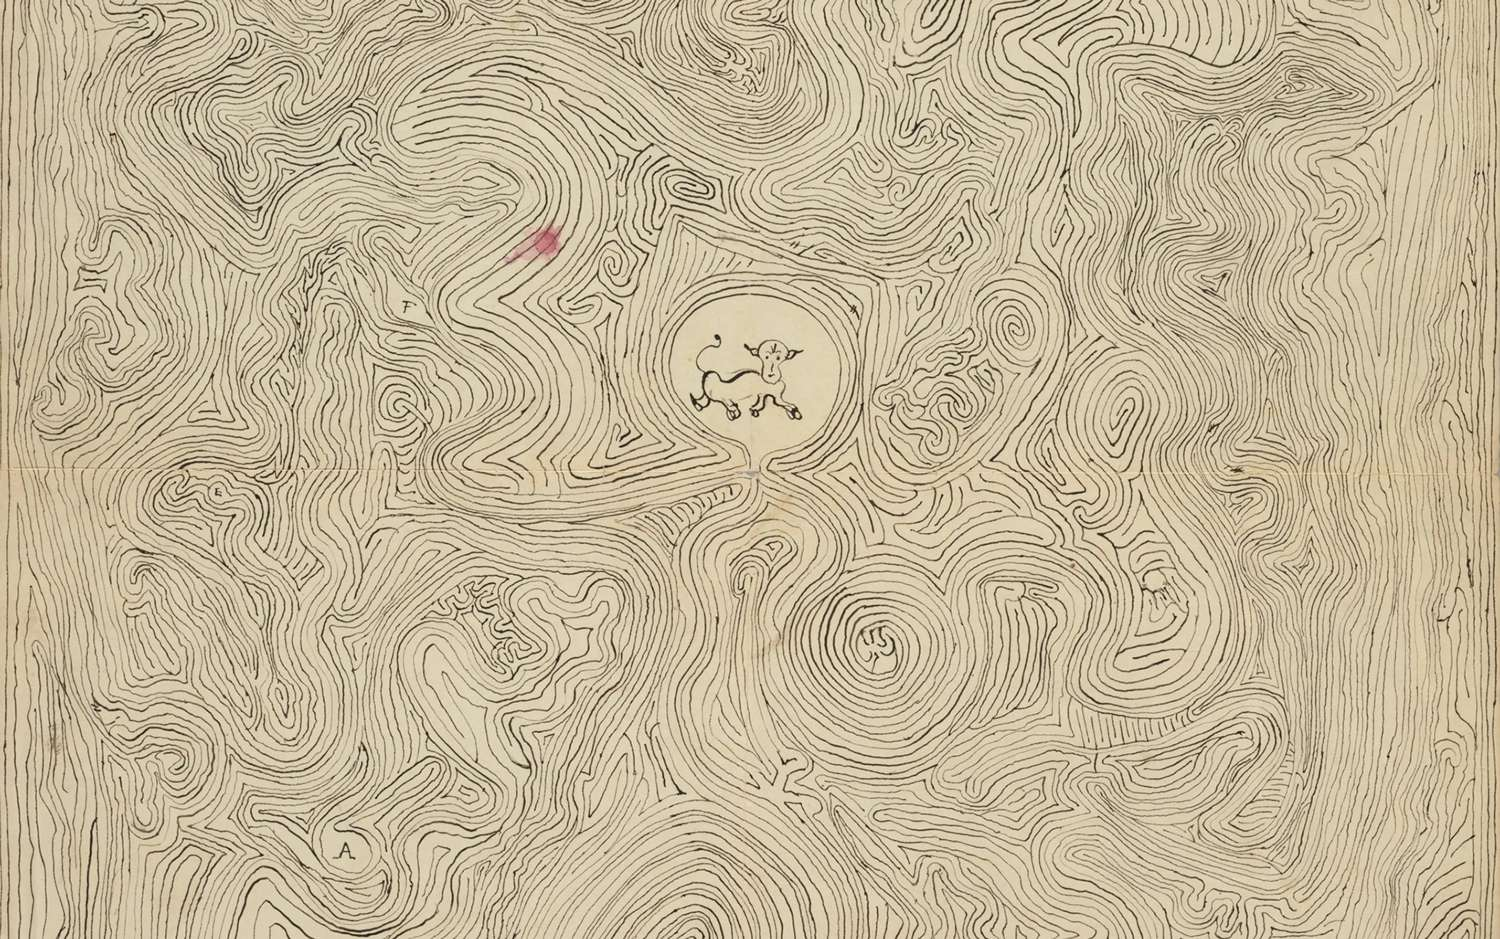

In [17]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Labyrinth diagram from Fragments on Games (undated). Charles Sanders Peirce Papers, Houghton Library, Harvard University.",
            ]
        }
    }
}

display(Image("media/cover.jpg"), metadata=metadata)

An earlier version of this work was presented as a short paper in (<cite id="wfq1k"><a href="#zotero%7C8665703%2F3HNPEEQC">(Pedretti, Picca, and Rodighiero 2025)</a></cite>) and is published in the *Anthology of Computers and the Humanities* (Volume 3).

Visual Language Models, Diagrams, IIIF, Semantic Web, Semiotics

Diagrams are crucial artifacts in many disciplines, demonstrating the close connection between visual representation and scholarly reasoning. However, their iconic form poses obstacles to visual studies, intermedial analysis, and text-based digital workflows. Charles S. Peirce consistently advocated the use of diagrams as essential tools for reasoning, calling his Existential Graphs "moving pictures of thought." His manuscripts, combining textual content with complex logical notation, provide a challenging case for studying documents involving heterogeneous materials.
In this study, we investigate whether Vision-Language Models can effectively identify and interpret such hybrid pages. We propose a computational pipeline that processes manuscript pages from Peirce's archive at Harvard's Houghton Library, combining layout segmentation, IIIF-compliant annotation, and VLM-based interpretation. To evaluate interpretation capabilities, we develop a tripartite semiotic evaluation framework grounded in Peirce's own categories: morphological (element enumeration), relational (spatial relationships), and representational (logical reading).
Our results reveal a gap between visual recognition and logical reasoning. While models perform competently at recognizing visual elements and parsing spatial relations, symbolic interpretation fails consistently, with systematic errors in quantifier scope, negation placement, and conditional structures. We use these findings to support the theoretical distinction between iconization (pattern recognition) and referentialisation (rule-governed interpretation). We conclude by discussing implications for AI-assisted historical research and proposing guidelines for human-machine collaboration in manuscript analysis.

## Introduction

Diagrams play a central role in many forms of reasoning, from mathematics to philosophy and religious art and have long served as fundamental tools for visual reasoning across scientific disciplines (<cite id="tmfkf"><a href="#zotero%7C8665703%2FLT84I8VT">(Feil 2024)</a></cite>, <cite id="tmqkg"><a href="#zotero%7C8665703%2FQA5B8DTV">(Hamburger 2019)</a></cite>, <cite id="esp8a"><a href="#zotero%7C8665703%2FWHMSYHGX">(Latour 1990)</a></cite>, <cite id="a90xg"><a href="#zotero%7C8665703%2FYQYQTRUY">(Rodighiero et al. 2023)</a></cite>). They function as active instruments for discovery, enabling forms of knowledge production distinct from purely symbolic expression. Recent advances in computer vision and multimodal learning have opened new opportunities to engage computationally with historical visual materials. Machine learning techniques have shown considerable success in art historical contexts, from iconographic classification (<cite id="5m66e"><a href="#zotero%7C8665703%2FZ3KJLP7C">(Cetinic, 2021)</a></cite>) to visual link retrieval (<cite id="w2x0i"><a href="#zotero%7C8665703%2FNNUL5MJR">(Garcia & Vogiatzis, 2019)</a></cite>), and in addressing technical challenges like handwritten text recognition in complex documents (<cite id="2dptf"><a href="#zotero%7C8665703%2FN7DJDWUA">(Fleischhacker et al., 2025)</a></cite>). However, the specific problem of automated interpretation of diagrams that encode logical and relational structures has received comparatively limited attention.

The growing availability of digitized cultural heritage collections has driven interest in tasks combining visual and textual modalities, including visual link retrieval, multimodal classification, iconographic captioning, and visual question answering, particularly where image content is accompanied by curatorial or scholarly metadata (<cite id="5m66f"><a href="#zotero%7C8665703%2FZ3KJLP7C">(Cetinic, 2021)</a></cite>, <cite id="8lrp1"><a href="#zotero%7C8665703%2F4VEW9A2Q">(Garcia et al., 2020)</a></cite>). Vision-Language Models have emerged as promising tools for bridging image analysis and knowledge extraction processes. However, while multimodal models demonstrate competence in describing visual elements at the surface level, they often struggle to understand the logical or spatial relationships among them (<cite id="rlv4c"><a href="#zotero%7C8665703%2F6EIEWTWV">(Sengupta et al., 2025)</a></cite>, <cite id="ul8wu"><a href="#zotero%7C8665703%2FWCRB65J9">(Kamoi et al., 2024)</a></cite>). Recent studies have shown that VLMs tend to rely on background knowledge rather than analyzing the internal structure of diagrams (<cite id="ul8wz"><a href="#zotero%7C8665703%2FWCRB65J9">(Kamoi et al., 2024)</a></cite>), revealing a critical gap between pattern recognition and structural comprehension. This limitation becomes particularly acute when confronting complex historical materials. The heterogeneity of historical manuscripts poses significant challenges for automated information extraction and semantic indexing (<cite id="qyl9c"><a href="#zotero%7C8665703%2FLA3K9MAK">(Aouinti et al., 2022)</a></cite>, <cite id="11yb7"><a href="#zotero%7C8665703%2FN7DJDWUA">(Fleischhacker, 2025)</a></cite>). Methods that enable scalable processing of visually rich documents frequently lack mechanisms for semantic enrichment, highlighting the need for approaches that combine visual segmentation with deeper interpretive frameworks (Pedretti et al. 2024). In this context, Charles Sanders Peirce's manuscripts provide an especially rich and complex test case, where diagrams function not as iconic illustrations of relations but as dynamic instruments of reasoning itself.

Among the most prominent theorists of diagrammatic reasoning is Charles S. Peirce, who conceived of diagrams as a subtype of icon capable of representing and manipulating the relational underpinning of objects through visual means (<cite id="y95c8"><a href="#zotero%7C8665703%2FQHRMP9QG">(Stjernfelt 2025)</a></cite>, <cite id="3ysim"><a href="#zotero%7C8665703%2FLYFI8U6T">(Waal, 2013)</a></cite>, <cite id="ceit9"><a href="#zotero%7C8665703%2FAUYQ24AE">(Zellweger 1991)</a></cite>, <cite id="bzqd2"><a href="#zotero%7C8665703%2FFW3ARBMD">(Leja 2025)</a></cite>). In his unpublished manuscripts, diagrams such as the Existential Graphs illustrate logical inferences via spatial configurations, offering a visual alternative to symbolic logic. Peirce referred to these constructs as “moving pictures of thought” (Collected Papers 4.8), underlining their dynamic and epistemological function, while also claiming that "all necessary reasoning is diagrammatic" (CP 5.162), arguing that any valid logical must be capable of visual representation. This idea finds its embodied expression in Peirce’s manuscripts, where textual content, visual artifacts, and complex layouts are seamlessly integrated (<cite id="cretg"><a href="#zotero%7C8665703%2FDF3XHHU4">(Keeler, 2020)</a></cite>). These documents reflect both his theoretical commitment to diagrammatic reasoning and its practical development through a mix of heterogeneous, multimodal writing. However, this visual richness remains largely inaccessible in existing printed editions, which are compiled under the editorial constraints (<cite id="t3aki"><a href="#zotero%7C8665703%2FDEMKHEXR">(Keeler, 2020)</a></cite>) of conventional publishing.

Recent work in visual semiotics, particularly the distinction between iconisation and referentialisation (<cite id="ge5dn"><a href="#zotero%7C8665703%2FH2XHRZTU">(Dondero & Fontanille, 2012)</a></cite>, <cite id="g1yvd"><a href="#zotero%7C8665703%2FHZ8L6BTF">(D’Armenio et al., 2025)</a></cite>), offers a lens for analyzing VLM limitations. This framework becomes especially relevant when examining diagrams designed explicitly for manipulation and transformation.

This study addresses these challenges by developing a structured evaluation methodology grounded in Peircean semiotics. We operationalize Peirce's triadic framework into three analytical levels that probe progressively deeper aspects of diagram comprehension: morphological questions target the recognition of basic visual elements, relational questions examine the capacity to identify structural relationships between elements, and representational questions assess the ability to reconstruct the logical operations encoded in diagrammatic configurations. By systematically testing multiple VLMs across these levels on Peirce's Existential Graphs, we can map the boundary between iconisation and referentialisation in machine vision. This approach reveals where pattern recognition ends and where genuine diagrammatic reasoning begins, providing empirical grounding for theoretical claims about the epistemological limits of computational interpretation in historical contexts.

Building on recent advances in the textual analysis of Peirce's manuscript "Prolegomena to an Apology for Pragmaticism" (<cite id="7z6s4"><a href="#zotero%7C8665703%2FS2A35A49">(Picca et al., 2023)</a></cite>), we extend the investigation to his visual thinking. We propose a computational pipeline for extracting structured knowledge from multimodal documents, beginning with page classification and layout segmentation to isolate diagrams, which are then linked to IIIF annotations. These fragments are submitted to VLMs via prompt-based interactions informed by Peirce's semiotic theory, with the aim of generating structured descriptions of diagrammatic content at multiple interpretive levels.

The central question driving this study is to what extent Vision-Language Models can interpret the logical structure of historical diagrams, and what systematic gaps exist between visual recognition and diagrammatic reasoning. To address this question, we make three contributions. First, we develop a computational pipeline combining page classification, layout segmentation, and IIIF-compliant annotation for processing large-scale heterogeneous manuscript collections and building a dataset. Second, we operationalise Peirce's semiotics into a tripartite evaluation methodology distinguishing morphological, relational, and representational levels of diagram comprehension. Finally, by testing five VLMs on Peirce's Existential Graphs, we aim to provide empirical evidence that models achieve strong performance on visual recognition but fail systematically at logical interpretation, corroborating the theoretical distinction between iconisation and referentialisation.

## Background

### Diagrammatic Practices

Diagrams have served as instruments of knowledge construction and exploration across different cultural and intellectual domains for centuries, ranging from art to scientific disciplines, and spanning a wide spectrum of epistemic registers. On one side, in medieval religious practice, diagrammatic forms structured devotional experiences, functioning as narrative and rhetorical devices. As an example, the transformation of Hrabanus Maurus's poems into visual-spatial structures shows how diagrams worked as active technologies for contemplation (<cite id="k3a1g"><a href="#zotero%7C8665703%2FQA5B8DTV">(Hamburger, 2019)</a></cite>). These *carmina figurata* ([Figure](#figure-tryptich-*)) combined text, image, and spatial design into stories which can be decoded by educated readers. The diagram became a site where theological concepts took concrete, manipulable form, enabling forms of understanding inaccessible through discursive means. Interestingly, this devotional function used diagrams as narrative devices capable of structuring temporal experience and guiding interpretive practices.

<>:9: SyntaxWarning: invalid escape sequence '\&'
<>:9: SyntaxWarning: invalid escape sequence '\&'
/var/folders/85/ctgk79xx1hj9d200n7l2zrfw0000gn/T/ipykernel_67124/1301677580.py:9: SyntaxWarning: invalid escape sequence '\&'
  "An example of diagram in religious art: Alton Towers Triptych, Cologne (?), ca. 1150. London, Victoria \& Albert Museum, inv. no. 4757-1858. Photo: © Victoria \& Albert Museum.",


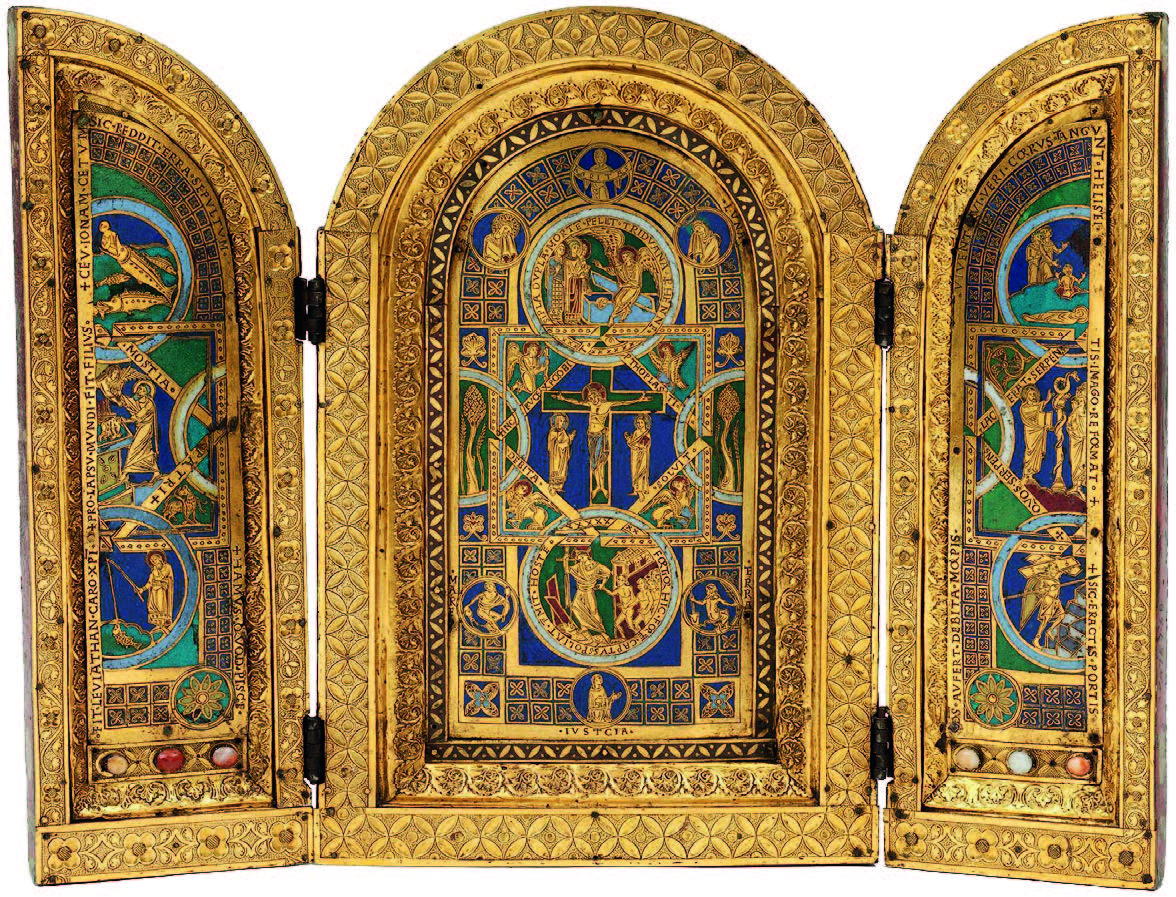

In [18]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "An example of diagram in religious art: Alton Towers Triptych, Cologne (?), ca. 1150. London, Victoria \& Albert Museum, inv. no. 4757-1858. Photo: © Victoria \& Albert Museum.",
            ]
        }
    }
}

display(Image("media/triptych.jpg", width=400), metadata=metadata)

Similarly, Klee's cosmological diagram ([Figure](#figure-klee-*)) maps relations between visible and invisible domains through spatial arrangement, encoding philosophical intuitions in visual form without the rigor of traditional scientific demonstrations. At the other end, scientific imaging presents similar interpretive challenges, though emerging from different epistemological practices. We can define *iconisation* as the stabilization process that enables form recognition, while *referentialisation* is the process of presentification and localisation within a presence field. For instance, as (<cite id="imxh3"><a href="#zotero%7C8665703%2FH2XHRZTU">(Dondero &#38; Fontanille, 2012)</a></cite>) have shown, parents often struggled to recognize their child in older ultrasounds technologies because pattern recognition (iconic stability) does not automatically match what is actually present through the screen of the ultrasound device (referential value). However, extending the previous example, failing to recognise a tumor on screen does not mean it is absent from the image. Usually, scientific images resolve this by processing data through two steps: one captures raw information, while the other creates a readable visual code. This separation becomes crucial for diagrams that encode logic operations through spatial arrangements or visual operators. Scientific visualization allows researchers to manipulate and combine representations to generate new knowledge (<cite id="t5oly"><a href="#zotero%7C8665703%2FWHMSYHGX">(Latour, 1990)</a></cite>). Astrophysical sketches show how visuals unify different theories, bridging abstract levels by layering elements (<cite id="xo0lk"><a href="#zotero%7C8665703%2FXZLKHUSD">(Bailer-Jones, 2002)</a></cite>). From radio maps to chemical formulas, scientific diagrams act as tools that shape knowledge. A semiotic approach is valuable here because it focuses on how diagrams function. It examines how spatial arrangements convey meaning and enable reasoning. A productive framework places diagrams at the intersection of representation (resemblance of relations) and manipulation (experimentation with relations), providing tools to understand how visual reasoning works.

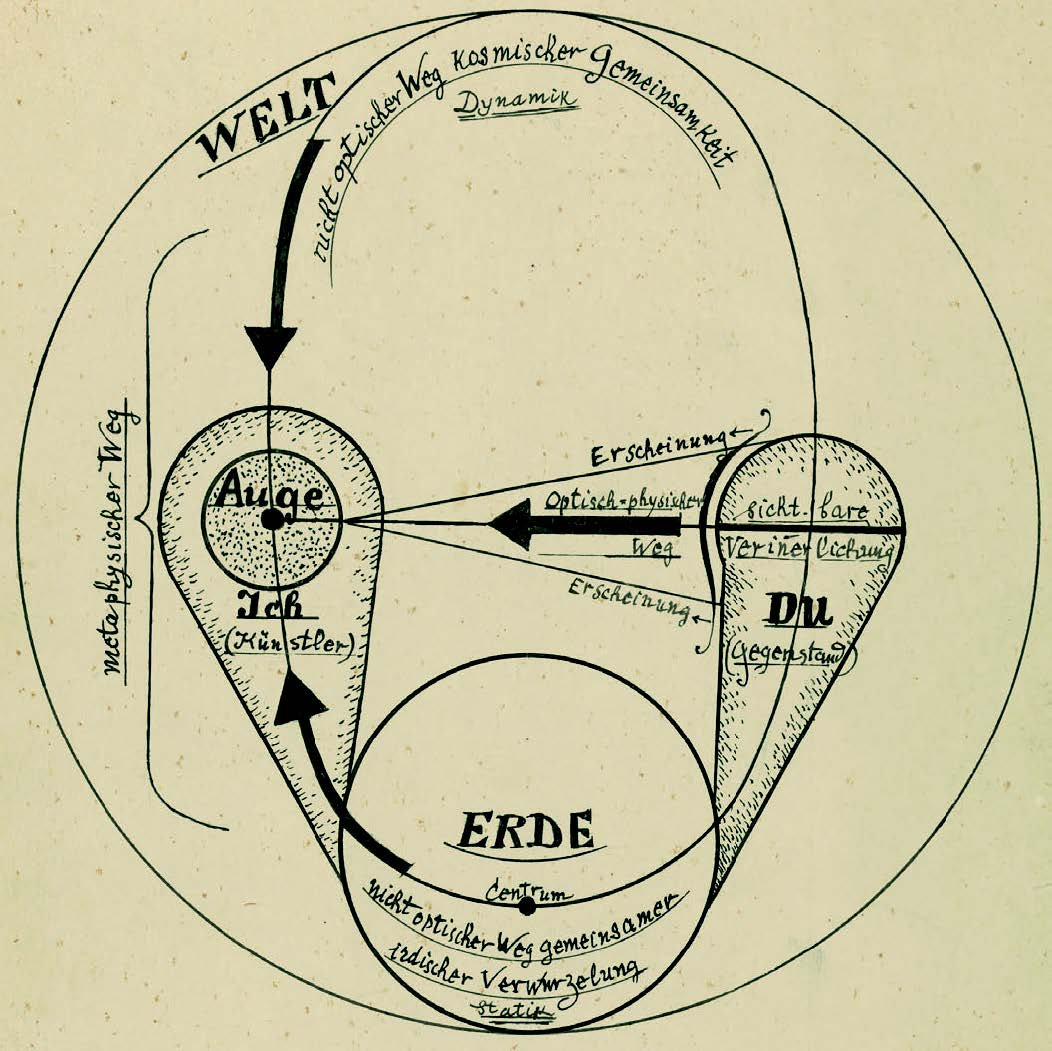

In [19]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Paul Klee's Theory of Pictorial Configuration as a diagram. Zentrum Paul Klee, Bern, Inv.Nr. BG A/030. Photo: Zentrum Paul Klee.",
            ]
        }
    }
}

display(Image("media/klee.jpg", width=400), metadata=metadata)

### Icons That Think

Between religious narratives and scientific images lies another possibility, where diagrams encode operations with schematic rules. Charles Sanders Peirce's theory of signs provides the conceptual foundation for understanding diagrams as reasoning instruments. In Peirce's triadic semiotics, signs represent their objects according to three distinctive modes. Icons represent their objects through resemblance or shared qualities. Indices point to their objects through causal or existential connection, as smoke indicates fire or a weathervane indicates wind direction. Symbols relate to their objects by habit, so that words like "cat" can arbitrarily relate to certain types of creatures. These modes are not mutually exclusive; most relations of signs to objects involve all three aspects to varying degrees ([Table](#table-triadic-*)). It is also important to note that these three sign types are not mutually exclusive categories, but coexisting aspects that appear in varying proportions within any given thing that functioning as a sign. For example, the “Face Throwing a Kiss Emoji” 😘 iconically resembles a human face with pursed lips. The heart serves as a symbol for love/affection, its rotation can be understood to iconically suggest motion, and the right-facing orientation of the lips will, in contexts like text messaging, where the message received would sit on the left side, indicate the addressee as receiver of the kiss. Even dominantly symbolic sign systems like natural languages can have an iconic dimension, as in onomatopoeia, where "buzz" resembles its referent, or indexical force through elements like demonstrative pronouns.

| Mode | Relation to Object | Example |
|------|-------------------|---------|
| Icon | Resemblance, shared qualities | Photograph of a face, map of a territory |
| Index | Causal or existential connection | Smoke indicating fire, weathervane indicating wind |
| Symbol | Acquired habit | The word "cat" denoting the animal |

Within the iconic mode, Peirce distinguished three subtypes he called hypoicons (CP 2.276-277). Images (usually what we think of when we think of icons in a conventional way) represent their objects through simple qualities, as a photograph resembles a face or a colour swatch resembles paint. Metaphors represent by representing their object by employing a parallelism, as when we speak of "grasping" an idea or describe an argument as "solid." Diagrams assume a middle position between images and metaphors in that they represent the actual "relations, mainly dyadic, or so regarded, of the parts of one thing by analogous relations in their own parts" (CP 2.277) ([Table](#table-hypoicons-*)). For example, a map that shows historical trade routes by positioning ports and drawing connecting lines already functions as a diagram, as it represents spatial and relational structures that mirror real-world networks of movement and exchange. The map need not resemble the territory in colour or texture; what matters is that the relational structure is preserved. Both convey difficult matters with clarity that can hardly be matched otherwise, and both are suited for experimentation. One can rearrange parts of a logic diagram much as one uses pins on a map to represent the deployment of forces in a battle (CP 4.530). However, just as a map need not mark every tree or rock, we should not expect a logic diagram to replicate exactly the objects it represents. The essential thing is that the diagram will be relationally faithful to what it represents, "differing from the objects themselves in being stripped of accidents" (Ms 524). The diagram should have all characteristics bearing on the reasoning involved, and no others (<cite id="rob1"><a href="#zotero%7C8665703%2F8NFDSZDB">(Roberts, 1973)</a></cite>).

| Subtype | Represents through | Example |
|---------|-------------------|---------|
| Image | Simple qualities | Photograph of a face |
| Diagram | Relational structure | Map, geometric proof |
| Metaphor | Parallelism | "Grasping" an idea, a "solid" argument etc. |

This relational correspondence gives diagrams their epistemic power. Unlike the mere perception of qualities, diagrams enable reasoning. As Peirce observed, "A great distinguishing property of the icon is that by the direct observation of it other truths concerning its object can be discovered than those which suffice to determine its construction" (CP 2.279). One can learn facts from a diagram facts that were not explicitly encoded in it. For example, the theorem that the sum of interior angles of any triangle equals can be proven by drawing a diagram: one draws a triangle, constructs a line parallel to the base through the apex, and observes that the three angles at the apex (two formed by the parallel line, one the original apex angle) together form a straight angle. The proof works because the diagram preserves the angular relations of the abstract triangle. Crucially, the same diagram can represent all triangles by altering its angles or side lengths while preserving its topology (<cite id="stj1"><a href="#zotero%7C8665703%2FQHRMP9QG">(Stjernfelt, 2007)</a></cite>). This also means that the diagram can be at the same time individual and universal: one reasons on a particular figure but draws a universal conclusion. Peirce himself distinguished between graph and graph-instance using the analogy of the word "the" appearing twenty times on an English page. Each occurrence is a separate instance (token) of the same word (Type) (<cite id="rob3"><a href="#zotero%7C8665703%2F8NFDSZDB">(Roberts, 1973)</a></cite>).

### The System of Existential Graphs

In particular, Peirce often emphasized the role of diagrams in reasoning (<cite id="3ysim"><a href="#zotero%7C8665703%2FLYFI8U6T">(Waal, 2013)</a></cite>), providing various examples of what he termed *diagrammatic reasoning* (CP 4.571, 5148, 6.213). On the one hand, diagrams appear to have an iconic nature. On the other hand, diagrams also possess a dynamic character, as they enable manipulation and iterative transformations according to the general laws governing the relationships among their parts, and as such, pose epistemological questions about the generation and production of knowledge (<cite id="qry59"><a href="#zotero%7C8665703%2F8NFDSZDB">(Stjernfelt, 2007)</a></cite>, <cite id="onfbd"><a href="#zotero%7C8665703%2FNNHDSILM">(Stjernfelt, 2022)</a></cite>,<cite id="ynopm"><a href="#zotero%7C8665703%2FZ69ZJ7UV">(Kiryushchenko, 2023)</a></cite>).

Peirce developed the *Existential Graphs* between 1896 and 1911 as a complete system of formal logic expressed through spatial configurations instead of algebraic notation (<cite id="2tysj"><a href="#zotero%7C8665703%2FSVGQE8AK">(Roberts, 1973)</a></cite>). The system consists of three (progressively complex) levels: Alpha, Beta, and Gamma, with each built upon the previous level.
Alpha Graphs constitute the foundation of the entire system and correspond to propositional logic. Alpha deals with relationships between propositions considered as wholes, providing a formulation of the propositional calculus and the logic of truth functions (<cite id="2tysj"><a href="#zotero%7C8665703%2FSVGQE8AK">(Roberts, 1973, 31)</a></cite>). The system employs only three basic symbolic elements: the Sheet of Assertion (a blank surface representing the universe of discourse), the cut (a closed curve denoting negation), and graph instances (propositions written on the sheet). Any proposition written on the Sheet of Assertion is asserted as true. Juxtaposed elements indicate conjunction. A proposition enclosed within a cut is denied. For example, a circle containing the word "raining" means "It is not raining." Through these minimal elements and their spatial arrangement, Alpha can express any proposition in classical propositional logic.

Beta Graphs extend Alpha by adding quantification and variables, corresponding to first-order predicate logic. The crucial innovation is the line of identity, a graphical device that represents existential quantification and coreference (<cite id="2tysj"><a href="#zotero%7C8665703%2FSVGQE8AK">(Roberts, 1973, 47)</a></cite>). A line of identity connects elements sharing the same referent, effectively binding variables across the diagram. For instance, a line connecting "man" to a cut containing "wounded" expresses "There exists a man who is not wounded" (∃x(man(x) ∧ ¬wounded(x))) ([Figure](#figure-beta-diagram-*)). Universal quantification emerges from combining existential quantification with negation: placing a line of identity inside nested cuts achieves the effect of "for all." The Beta system's visual treatment of quantification makes scope relations directly visible through the topological structure of the diagram, rendering explicit what remains implicit in algebraic notation.

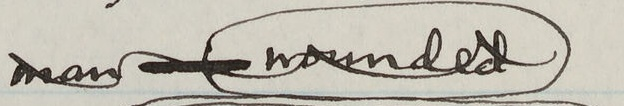

In [20]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Beta Existential Graph from Charles S. Peirce, Chapter III. The Simplest Mathematics (Logic III), ca. 1902. Houghton Library, Harvard University, MS Am 1632 (431).",
            ]
        }
    }
}

display(Image("media/hou02614c00458_seq15_detail.jpg", width=500), metadata=metadata)

Gamma Graphs represent Peirce's most ambitious but incomplete extension of the system. Gamma attempts to formalize second-order logic, modality, and reasoning about abstractions including qualities, relations, and graphs themselves as objects of discourse (<cite id="2tysj"><a href="#zotero%7C8665703%2FSVGQE8AK">(Roberts, 1973, 64)</a></cite>). Peirce introduced new notation for this level: potentials (symbols denoting properties and relations as entities), graphs of graphs (diagrams that take other diagrams as their subject matter), and the broken cut (a dashed enclosure representing possibility or modal operators). For example, Gamma can express statements like "A is a proposition" or "There exists a quality such that...". While Peirce never completed the Gamma system, the ambition shows his commitment to developing a complete visual logic capable of representing philosophical and mathematical arguments.

This framework presents a challenge for computational hermeneutics. If reasoning relies on diagrammatic manipulation, then understanding a diagram must involve grasping the operations and transformations it enables.

### Vision-Language Models and Visual Comprehension: Two Analytical Axes

The integration of computer vision and language models has opened new possibilities for automated image interpretation. Vision-Language Models demonstrate competence in describing visual content, generating captions, and answering questions about images. Applications in cultural heritage contexts have shown promising results for tasks like iconographic classification and visual link retrieval (<cite id="ms0zd"><a href="#zotero%7C8665703%2FZ3KJLP7C">(Cetinic, 2021)</a></cite>, <cite id="htycw"><a href="#zotero%7C8665703%2FNNUL5MJR">(Garcia &#38; Vogiatzis, 2019)</a></cite>). These successes suggest potential for extracting structured knowledge from complex visual materials.
However, recent work reveals systematic limitations in how VLMs process visual information. While multimodal models can identify surface-level elements, they struggle to understand logical or spatial relationships among those elements (<cite id="djueh"><a href="#zotero%7C8665703%2F3EUQWJ9V">(Hou et al., 2024)</a></cite>). Evaluation studies show that VLMs tend to rely on background knowledge instead of analyzing the internal structure of images. In particular, when confronted with diagrams in scientific papers, models often recognize individual components (circles, lines, text) without grasping how those components relate to form meaningful structures.

Moreover, VLMs frequently hallucinate relationships or rely on interpretations drawn from training data. Chain-of-regions approaches attempt to address this by decomposing diagrams into meaningful areas before interpretation, improving spatial reasoning capabilities (<cite id="vbd3i"><a href="#zotero%7C8665703%2FWCRB65J9">(Kamoi et al., 2024)</a></cite>). Similarly, structured prompting strategies have shown some success in guiding models toward more accurate diagram interpretation, particularly when combined with modular reasoning pipelines. Nevertheless, performance remains inconsistent across different diagram types and complexity levels.

Understanding scientific images depends on knowledge of the practices and technical processes that produce them (<cite id="cmy1p"><a href="#zotero%7C8665703%2FH2XHRZTU">(Dondero &#38; Fontanille, 2012)</a></cite>). In the ultrasound image, what appears on the screen is the result of a complex sequence of transformations. First, a transducer emits sound waves that penetrate the body. Then, different tissues reflect these waves back with varying intensity. The returning signals are captured, converted into electrical impulses, and finally rendered as a visual pattern of light and shadow. Each step in this chain shapes what becomes visible and what remains hidden. An observer who does not grasp this sequence of exploration cannot properly interpret what the image shows, because there is no direct resemblance between the visual output and the object it represents.
This sequence makes explicit that "seeing" a scientific image involves calibrating one's interpretive stance. We can identify different levels at which such calibration operates. Distal adjustment concerns scale and distance. An aerial photograph taken from sufficient altitude can render a familiar bridge unrecognisable, not because information is missing but because the viewer cannot map the visual pattern onto prior knowledge of what bridges look like from ground level. Structural adjustment operates at a deeper level: it requires understanding the instrumental apparatus itself, the way a particular imaging technology transforms its object into visual form. Without these calibrations, images remain uninterpretable despite being visually accessible (<cite id="cmy1z"><a href="#zotero%7C8665703%2FH2XHRZTU">(Dondero &#38; Fontanille, 2012)</a></cite>). This dependency becomes especially acute when images serve as experimental supports. Scientific images function as sites for manipulation, decomposition, and recomposition. They are instruments for testing different data configurations and assessing their stability. Comprehension emerges through active engagement with visual structures. This operational character aligns directly with diagrammatic reasoning: diagrams depend on experimentation and manipulation according to transformation rules to yield inferential knowledge (Peirce CP 4.571; <cite id="088u9"><a href="#zotero%7C8665703%2F8NFDSZDB">(Stjernfelt, 2007)</a></cite>). From the understanding of a diagram follows being able to perform operations on it.

Drawing on these theoretical premises and on existing literature on visual semiotics, we employ two analytical axes for describing and evaluating visual comprehension (<cite id="cny1p"><a href="#zotero%7C8665703%2FH2XHRZTU">(Dondero &#38; Fontanille, 2012)</a></cite>): 
1. The first axis spans *iconisation* and *referentialisation*. Iconisation stabilises visual forms for recognition. This process operates at the level of visual pattern matching by recognizing forms and identifying recurring configurations. The stability of iconic recognition allows forms to be identified consistently across multiple viewing instances. Referentialisation instead is the operation of reconstructing the processes that generate visual forms and establishes what those forms present within their production context. For the ultrasound image example, this means understanding how ultrasound waves interact with tissue structures to produce specific brightness patterns. Basically, referentialisation connects visual output to the instrumental sequence that produced it, making explicit the relationship between what appears and how it came to appear.
2. The second axis spans *observation* and *operationalisation*. Observation involves visual access to elements and their spatial arrangement. An observer can enumerate components, describe their positions, and characterize visual properties (connected, overlapping, adjacent). This level corresponds to what can be extracted through visual inspection alone. Operationalisation involves active manipulation according to explicit rules. For Existential Graphs, this means being able to predict the logical consequences of transformations, and recognize which operations preserve or alter truth conditions. An interpreter operating at this level can take a diagram showing "¬(P ∧ Q)" and derive "¬P ∨ ¬Q" through rule-governed transformation. Operationalisation requires knowing what operations are permissible, under what conditions, and what inferential consequences follow.

Existential Graphs were selected as case study for two reasons: Peirce's manuscripts provide comprehensive explanations of their rules, and the notation uses simple visual operators.

## Corpus and Methods

### Corpus Description

The Charles S. Peirce Papers (MS Am 1632), housed at Harvard's Houghton Library, represent one of the most extensive archival collections of Peirce's unpublished works. Following Peirce's death in 1914, Harvard University acquired approximately 100,000 manuscript pages from his widow. However, the collection presents several organisational challenges. Richard Robin's Annotated Catalogue of the Papers of Charles S. Peirce (1967) established the current classification system organizing manuscripts by scientific discipline into twelve thematic categories (Mathematics, Pragmatism, Phenomenology, Logic, Metaphysics, Physics, History, Practical Science, Translations, Miscellanea, Biographical, and uncategorized materials). This organization structure does not reflect the chronological development of Peirce's thought, and the concept of "work" remains problematic for manuscripts existing primarily as drafts, revisions, and exploratory writings (<cite id="o0rmy"><a href="#zotero%7C8665703%2FDF3XHHU4">(Keeler, 2020)</a></cite>).

Moreover, the collection exhibits extreme material heterogeneity. Manuscripts span from the mid-19th century to the early 20th century and employ all types of ink, colored pencil, and graphite on diverse paper stocks such as single sheets, bound composition notebooks, and occasional printed journals (Keeler 2020). Physical conditions also vary considerably. The archive contains text enclosed in graphical figures, graphics embedded in text, text contoured around graphics, whole pages of graphics with no text, and graphical figures employing as many as four colors to make critical logical distinctions (<cite id="g3lub"><a href="#zotero%7C8665703%2FDEMKHEXR">(Keeler, 2020)</a></cite>). This multimodality reflects Peirce's increasing difficulty constraining his mature philosophical thought within conventional textual formats (<cite id="g3lab"><a href="#zotero%7C8665703%2FDEMKHEXR">(Keeler, 2020)</a></cite>).

### Corpus Analysis

A subset of 233 items from this collection has been digitized and made available through IIIF Manifests via the Harvard Hollis system, yielding 15,695 high-resolution facsimile images. To prepare this corpus for computational processing, we retrieved IIIF metadata for each digitized item, including canvas structure, image URIs, and classification labels derived from Robin's catalogue. All canvases were downloaded at full resolution and organized into thematic folders. Blank pages, identified using IIIF metadata, were automatically excluded, resulting in 15,682 manuscript pages available for analysis. All the scripts used for the pipeline are available at [Github](https://github.com/friendlynihilist/PIP-Manuscripts-Processor){:target="_blank"}.

#### Page-Level Classification

The first step in the pipeline distinguishes manuscript pages containing visual elements from those consisting exclusively of textual content. A manually annotated dataset of 1,317 manuscript pages was constructed with three classes: *Cover* pages (102 pages, 7.74%), *Text* pages containing only written content (604 pages, 45.86%), and *Visual Elements Mixed* pages containing at least one visual element alongside text (611 pages, 46.39%). The balanced distribution between *Text* and *Visual Elements Mixed* classes reflects the manuscript corpus composition while providing sufficient training examples for each category ([Table](#table-corpus-1-*)).

| Class | Count | Percentage |
|---|---|---|
| Cover | 102 | 7.74 |
| Visual Elements Mixed | 611 | 46.39 |
| Text | 604 | 45.86 |

Three feature extraction strategies were compared: HOG (gradient-based baseline), CNN features (ResNet18), and CLIP embeddings (ViT-B/32). CLIP performed best, likely because its semantic embeddings capture abstract properties like 'diagrammatic structure' better than traditional visual features.

For each feature extraction strategy, five classification algorithms were trained and evaluated: Linear Support Vector Machine with L2 regularization, Logistic Regression with L2 penalty, Random Forest with 100 estimators, Support Vector Machine with Radial Basis Function kernel, and k-Nearest Neighbors with k=5. This systematic comparison encompassed fifteen model configurations (three feature types × five classifiers), enabling empirical determination of the optimal combination. All classifiers were trained using 10-fold stratified cross-validation to ensure robust performance estimation across data partitions. Stratification maintained class distribution proportions in each fold, preventing evaluation bias from class imbalance.

#### Layout Segmentation with YOLOv8m

Pages classified as *Visual Elements Mixed* require precise localization of visual and textual regions to enable targeted analysis. Object detection provides bounding box coordinates for each element, supporting structured annotation workflows and enabling separate processing of diagrammatic content. A manually annotated dataset of 443 manuscript images was constructed using a simple two-class schema: *visual* for visual elements (which include mostly diagrams, but also geometric figures, logical notation, sketches, symbolic arrangements) and *text block* for textual regions. More granular distinctions (dates, titles, algebraic formulas, sketch types) would introduce class imbalance given limited training examples, while stricter single-class detection would prove troublesome to distinguish visual from textual content.

Among the 443 annotated pages, 207 contain visual annotations (totaling 1,139 bounding boxes, averaging 5.5 iconic elements of diagrammatic nature per page), while 191 contain text block annotations (totaling 874 bounding boxes, averaging 4.58 text blocks per page). These statistics indicate that manuscript pages frequently contain multiple visual elements, and that visual elements often coexist with substantial textual commentary. The higher average diagram count per page (5.5 vs 4.58) reflects Peirce's practice of producing multiple related diagrams on single sheets, particularly when exploring logical transformations or comparing alternative notations.

| Class | Images | Annotations | Avg per Image |
|---|---|---|---|
| Diagram | 207 | 1,139 | 5.5 |
| Text Block | 191 | 874 | 4.58 |

The dataset was partitioned into training and validation subsets using an 80/20 ratio stratified by page to prevent data leakage (no page appears in both splits even after augmentation). The training set comprises 443 images with 2,358 visual annotations and 1,739 text block annotations, while the validation set comprises 111 images with 687 visual annotations and 496 text block annotations. To address class imbalance and increase model robustness to manuscript variability, data augmentation was applied exclusively to training images containing at least one visual annotation. Two synthetic variants were generated for each augmented page through random combinations of photometric transformations (brightness, hue and contrast adjustment) and geometric transformations (rotation, scaling or horizontal flipping), resulting in a final training set of 1,133 images.

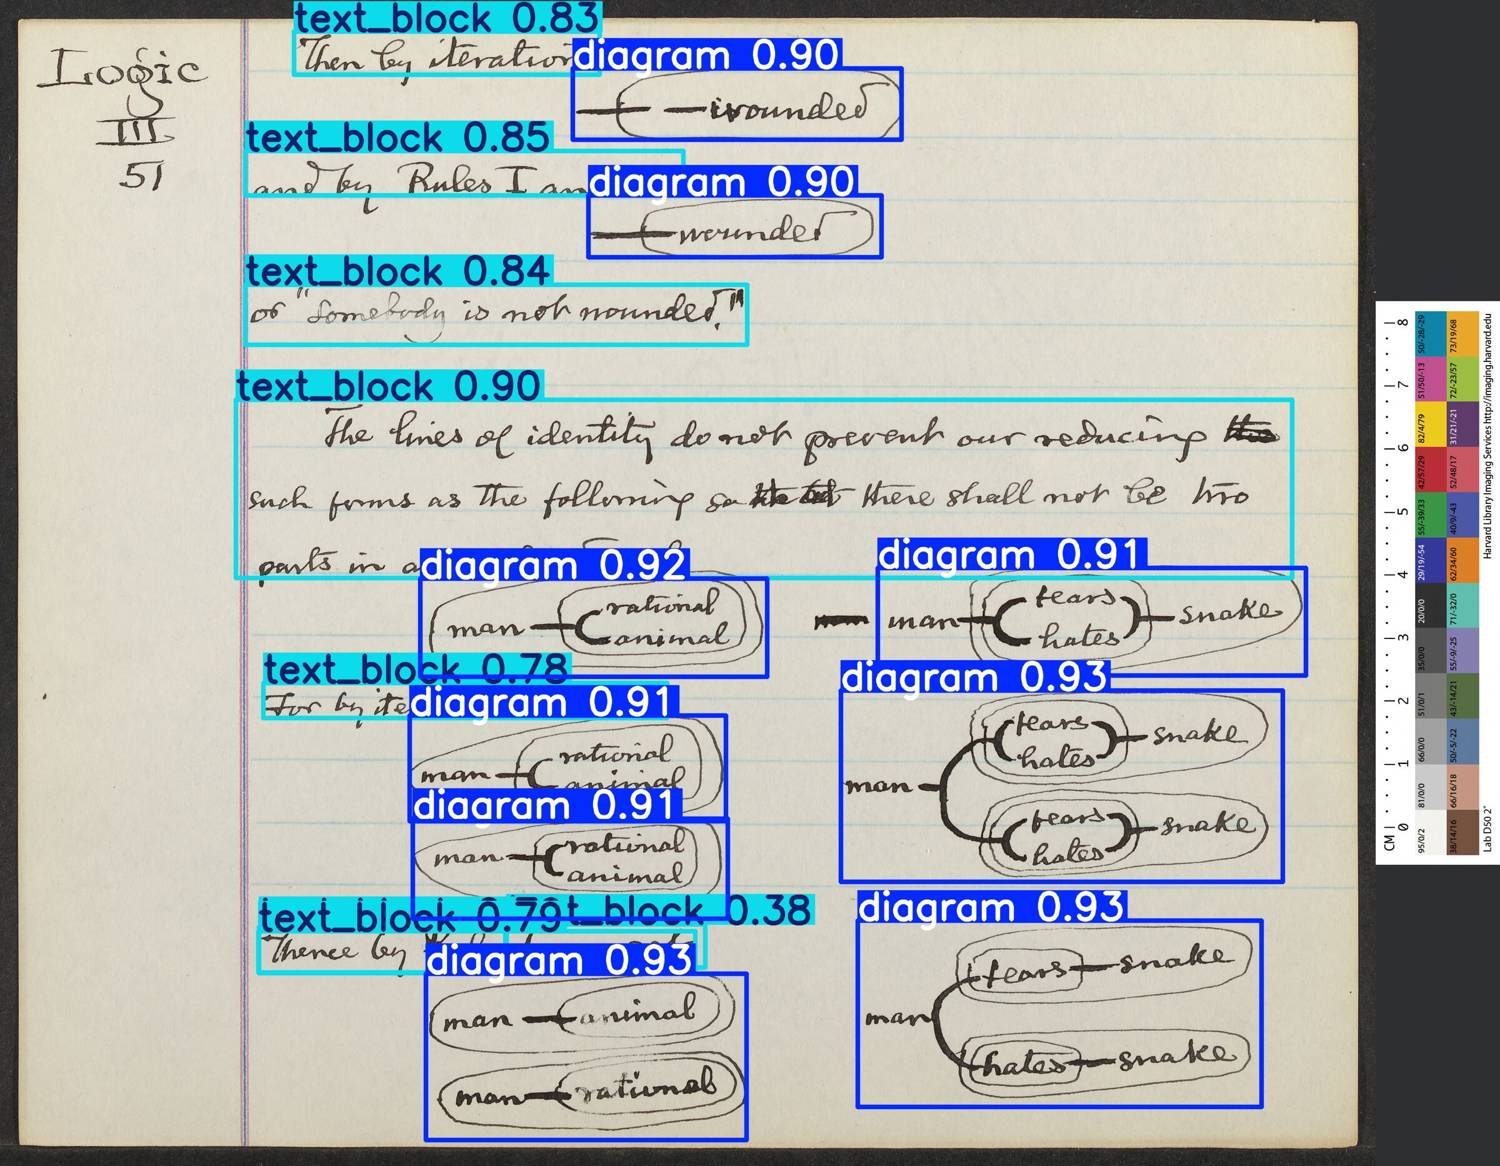

In [21]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Fine-tuned YOLOv8m output showing diagram (blue) and text block (light blue) detection on manuscript page ca. 1902. Charles S. Peirce Papers, MS Am 1632 (431), Houghton Library, Harvard University.",
            ]
        }
    }
}

display(Image("media/hou02614c00458_seq625.jpg", width=600), metadata=metadata)

YOLOv8m was fine-tuned from COCO-pretrained weights for 50 epochs (batch size 16, image resolution 640×640). Data augmentation (mosaic and mixup) was applied to improve generalization. Early stopping monitored validation mAP@0.5 to prevent overfitting.

| Split | Images | Diagram Annotations | Text Block Annotations |
|---|---|---|---|
| Train | 443 | 2,358 | 1,739 |
| Validation | 111 | 687 | 496 |

### Semantic Annotation Workflow

Detection outputs are transformed into a International Image Interoperability Framework (IIIF) annotation using the Web Annotation Data Model (WADM). Each detected bounding box generates an annotation instance linking a specific canvas region (target) to a semantic class label (body). Coordinates are expressed using the xywh fragment selector specifying pixel offsets and dimensions relative to the IIIF Canvas coordinate system, enabling precise anchoring of detected elements within full-resolution manuscript images.
To enhance semantic expressiveness, we employ the Multi-Level Annotation Ontology (<cite id="mcpj5"><a href="#zotero%7C8665703%2FFD4BNSAK">(Pedretti et al., 2024)</a></cite>), an extension of WADM that introduces a class to separate the annotated physical region from its conceptual referent. Each anchor is linked to the IIIF URI of the full manuscript page, enabling shared conceptual references across multiple regions. This approach aims to transform the IIIF Manifest into a unified editorial model. Diagram annotations serve as attachment points for captions, interpretative metadata, and paradata documenting the computational workflow. Researchers can progressively enrich the Manifest with transcriptions, translations, scholarly commentary, and cross-references to external resources without modifying the underlying image files.
Annotations are then serialised in JSON-LD format and converted to RDF triples, integrating them into Linked Open Data (LOD) infrastructure. This semantic encoding creates an open, interoperable knowledge graph queryable via SPARQL, enabling comparative analysis of diagram distribution, co-occurrence patterns between textual and visual elements, and integration with external scholarly resources. To conclude, these annotations provide structured metadata for manuscript browsing and navigation through IIIF viewers, and they define input regions for subsequent VLM evaluation by isolating individual diagram instances for interpretative analysis.

### Corpus Distribution and Temporal Patterns

As illustrated in ([Figure](#figure-distribution-*)), the distribution of diagrams varies significantly across categories. Logic manuscripts contain the highest absolute volume of diagrammatic material (1,116 pages, or 10.4% of the category), followed by Pragmatism (5%). While Mathematics and Metaphysics exhibit higher relative densities (22.7% and 19.3% respectively), their total page counts are considerably smaller. The high density in Miscellanea (75.4%) likely reflects an archival artifact rather than a distinct generic trait, while categories such as Physics and History contain virtually no diagrams. Consequently, the Logic manuscripts offer the most robust dataset for analysis, combining substantial volume with consistent diagrammatic practice.

In [22]:
%pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


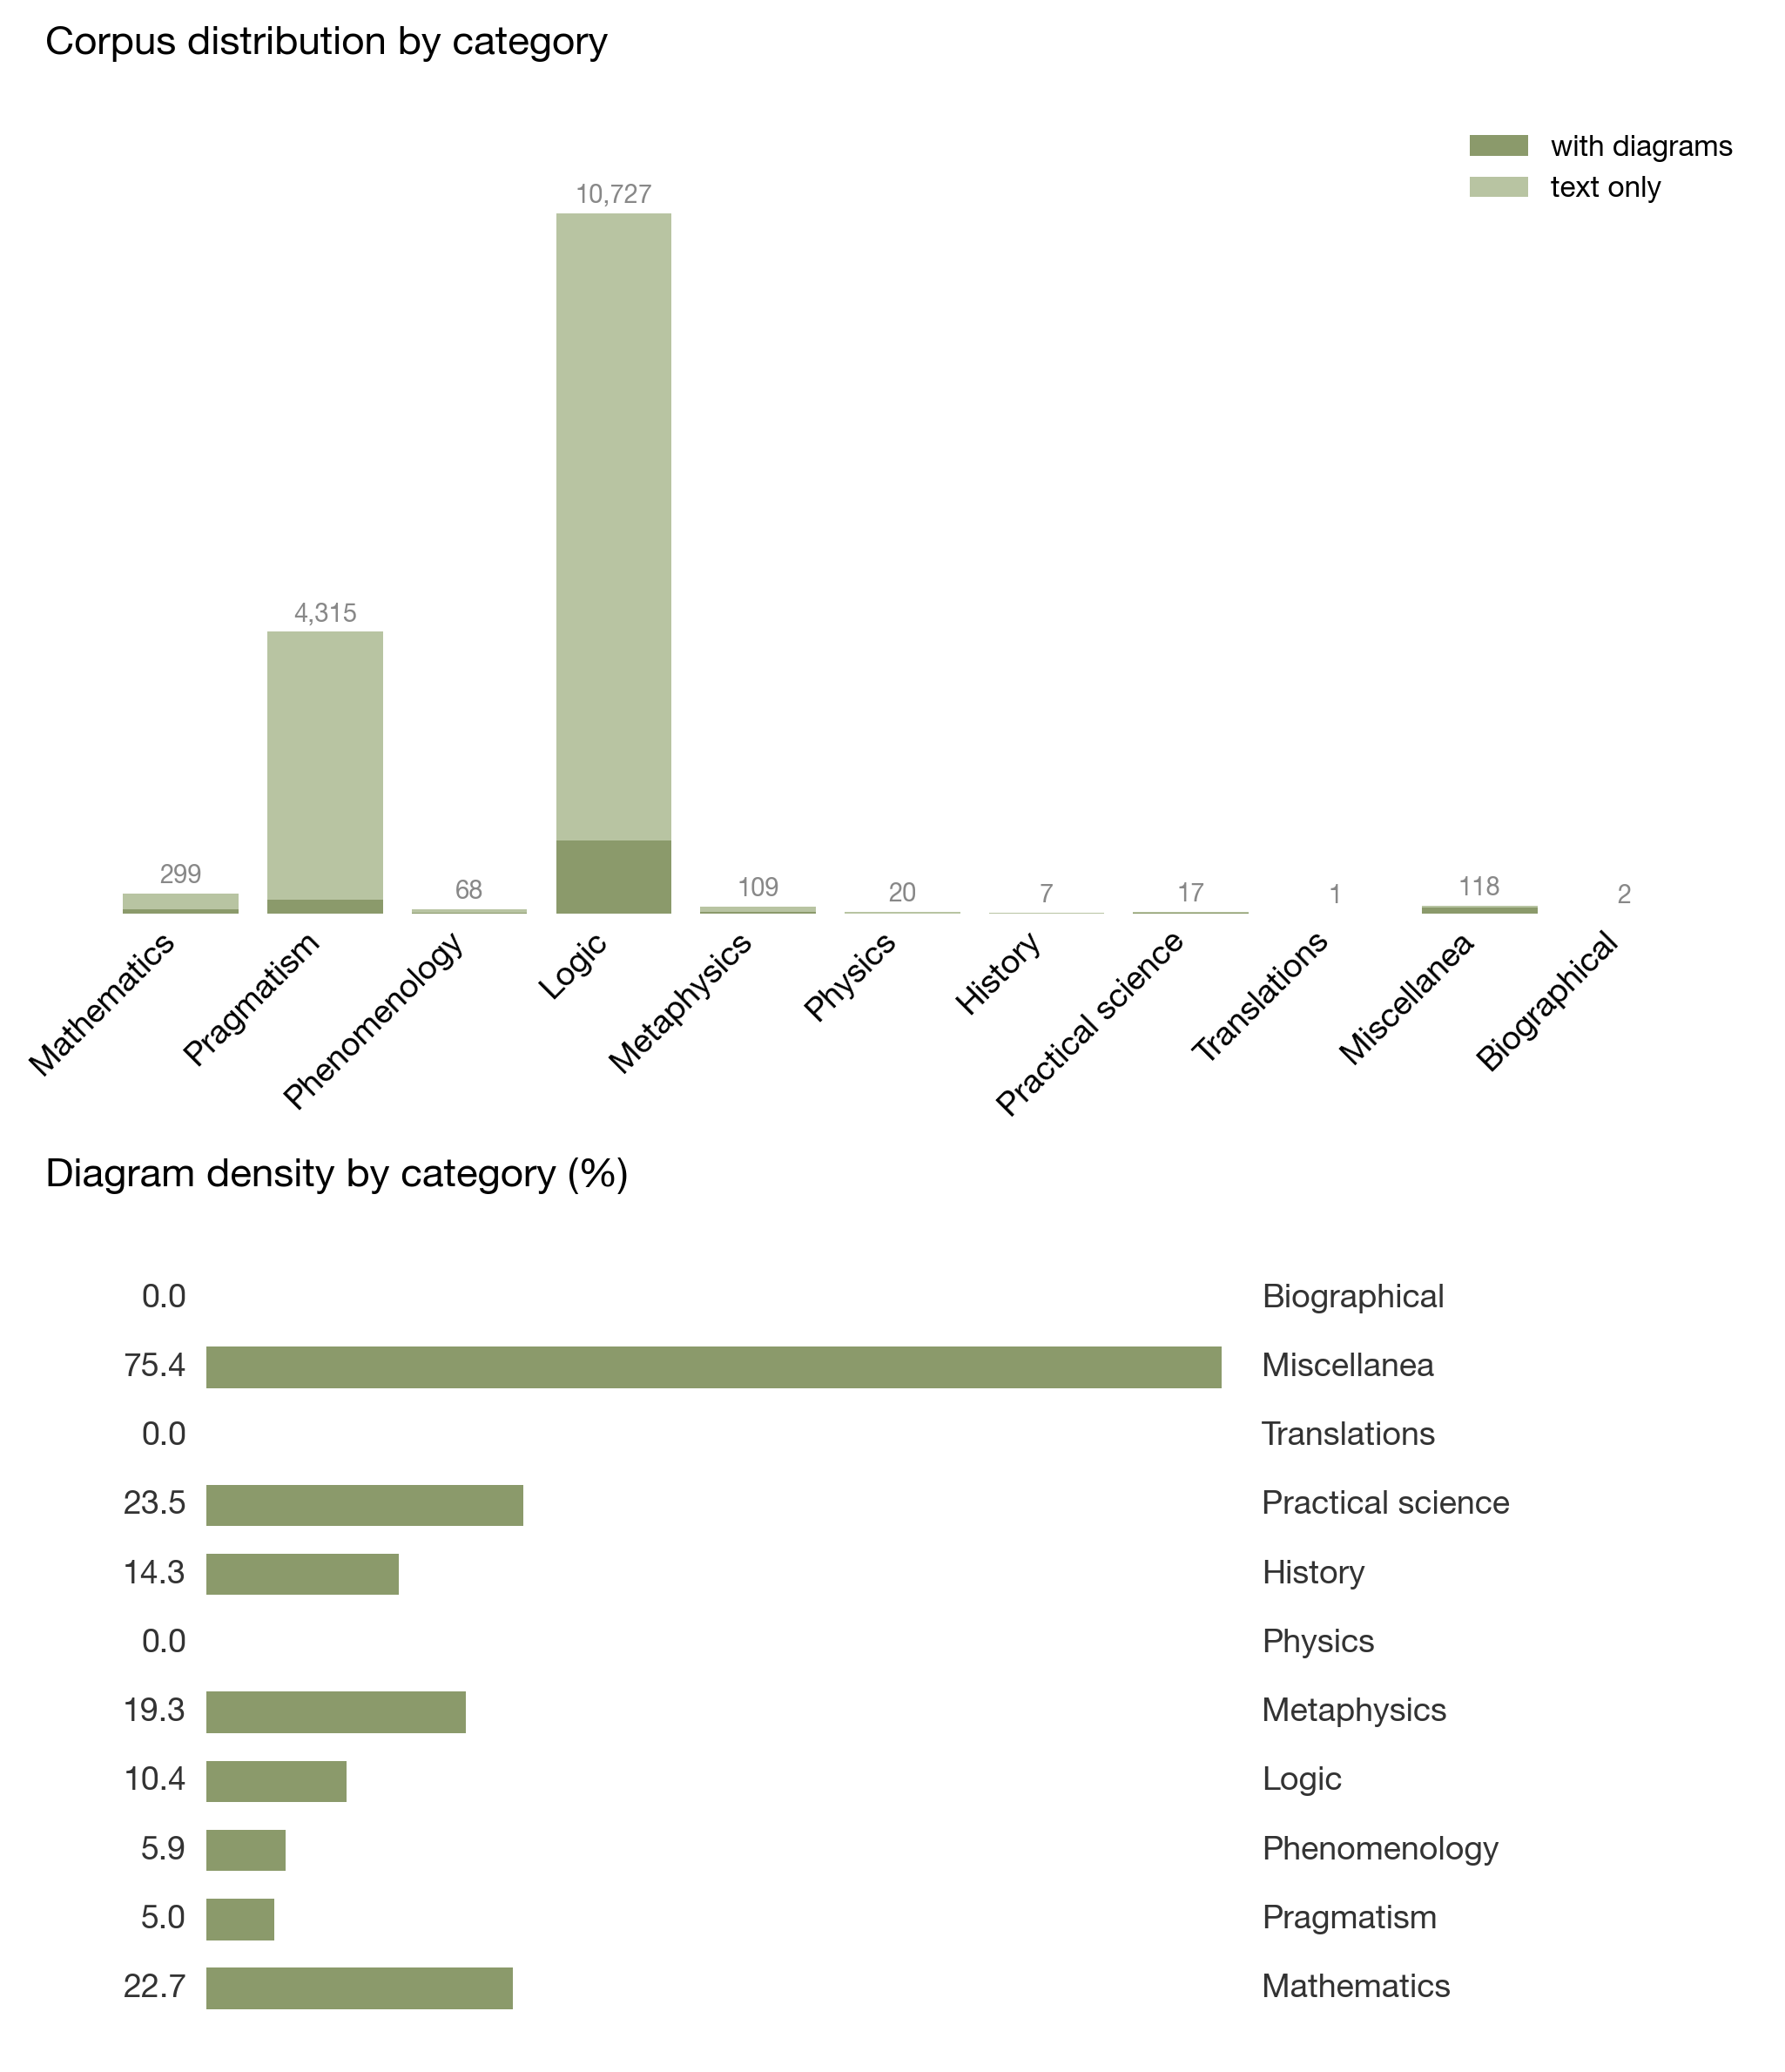

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# === STYLE CONFIG ===
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.weight': 'light',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.titleweight': 'light',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
    'legend.frameon': False,
})

OLIVE = '#8B9A6B'
OLIVE_LIGHT = '#B8C4A2'
GRAY = '#888888'

# === LOAD DATA ===
df = pd.read_csv('script/corpus_distribution_by_category.csv')
categories = df['category'].str.split('.', expand=True)[1].str.strip()

# === CREATE FIGURE ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))

# --- CHART 1: Stacked vertical bar ---
x_pos = np.arange(len(categories))

ax1.bar(x_pos, df['pages_with_diagrams'], color=OLIVE, label='With diagrams')
ax1.bar(x_pos, df['total_pages'] - df['pages_with_diagrams'], 
        bottom=df['pages_with_diagrams'], color=OLIVE_LIGHT, label='Text only')

for i, total in enumerate(df['total_pages']):
    ax1.text(i, total + 80, f'{total:,}', ha='center', va='bottom', fontsize=7, color=GRAY)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.set_yticks([])
ax1.set_title('Corpus distribution by category', loc='left', pad=15)
ax1.set_ylim(0, max(df['total_pages']) * 1.15)

legend_elements = [
    Patch(facecolor=OLIVE, label='with diagrams'),
    Patch(facecolor=OLIVE_LIGHT, label='text only')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# --- CHART 2: Horizontal bar ---
y_pos = np.arange(len(categories))
ax2.barh(y_pos, df['percentage_diagrams'], color=OLIVE, height=0.6)

max_pct = max(df['percentage_diagrams'])
for i, (cat, pct) in enumerate(zip(categories, df['percentage_diagrams'])):
    ax2.text(-1.5, i, f'{pct:.1f}', ha='right', va='center', fontsize=9, color='#333333')
    ax2.text(max_pct + 3, i, cat, ha='left', va='center', fontsize=9, color='#333333')

ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(-12, max_pct + 40)
ax2.set_title('Diagram density by category (%)', loc='left', pad=15)

plt.tight_layout()
plt.show()

The temporal distribution of diagrammatic content across Peirce's manuscripts reveals distinct phases in his visual reasoning practice ([Figure](#figure-temporal-*)). The earliest period (1860-1864) shows modest diagrammatic activity in Logic manuscripts (5.02%, 14 of 279 pages), though a small Metaphysics sample exhibits high diagram density (74.07%, 20 of 27 pages). The subsequent period (1865-1869) defines Peirce's most productive phase by volume, with 4,095 Logic pages and 2,614 Pragmatism pages; nonetheless diagrammatic production remains relatively low (6.52% and 3.63% respectively). This suggests intensive textual production with selective use of visual elements during his early career development.
A relevant shift occurs in 1895-1899, marking the watershed moment in Peirce's diagrammatic practice. Logic manuscripts from this period exhibit 50.6% diagram density (168 of 332 pages), representing a tenfold increase from earlier decades. Mathematics manuscripts show even higher concentration at 92.31% (12 of 13 pages). This period corresponds precisely to Peirce's intensive development of Existential Graphs. The concentration of diagrammatic content during these years also documents the methodological centrality of visual reasoning during the development of this theoretical phase. The 1885-1889 period shows intermediate values (18.91% in Logic), suggesting gradual intensification of diagrammatic methods leading to the 1895-1899 peak.
The pattern shifts again after 1900. Logic manuscripts from 1900-1904 show reduced diagram density (6.19%, 159 of 2,568 pages) despite substantial manuscript volume, while Pragmatism manuscripts increase slightly to 8.87% (55 of 620 pages). The 1905-1909 period maintains modest levels (12.12% Logic, 6.86% Pragmatism), and the final period 1910-1914 shows further decline in Logic (2.59%, 20 of 773 pages) though Mathematics manuscripts remain diagram-intensive (23.79%, 49 of 206 pages). Given the density of diagrammatic practice from 1895 to 1899, this period offers the most consistent material for a systematic investigation of Peirce's visual reasoning.

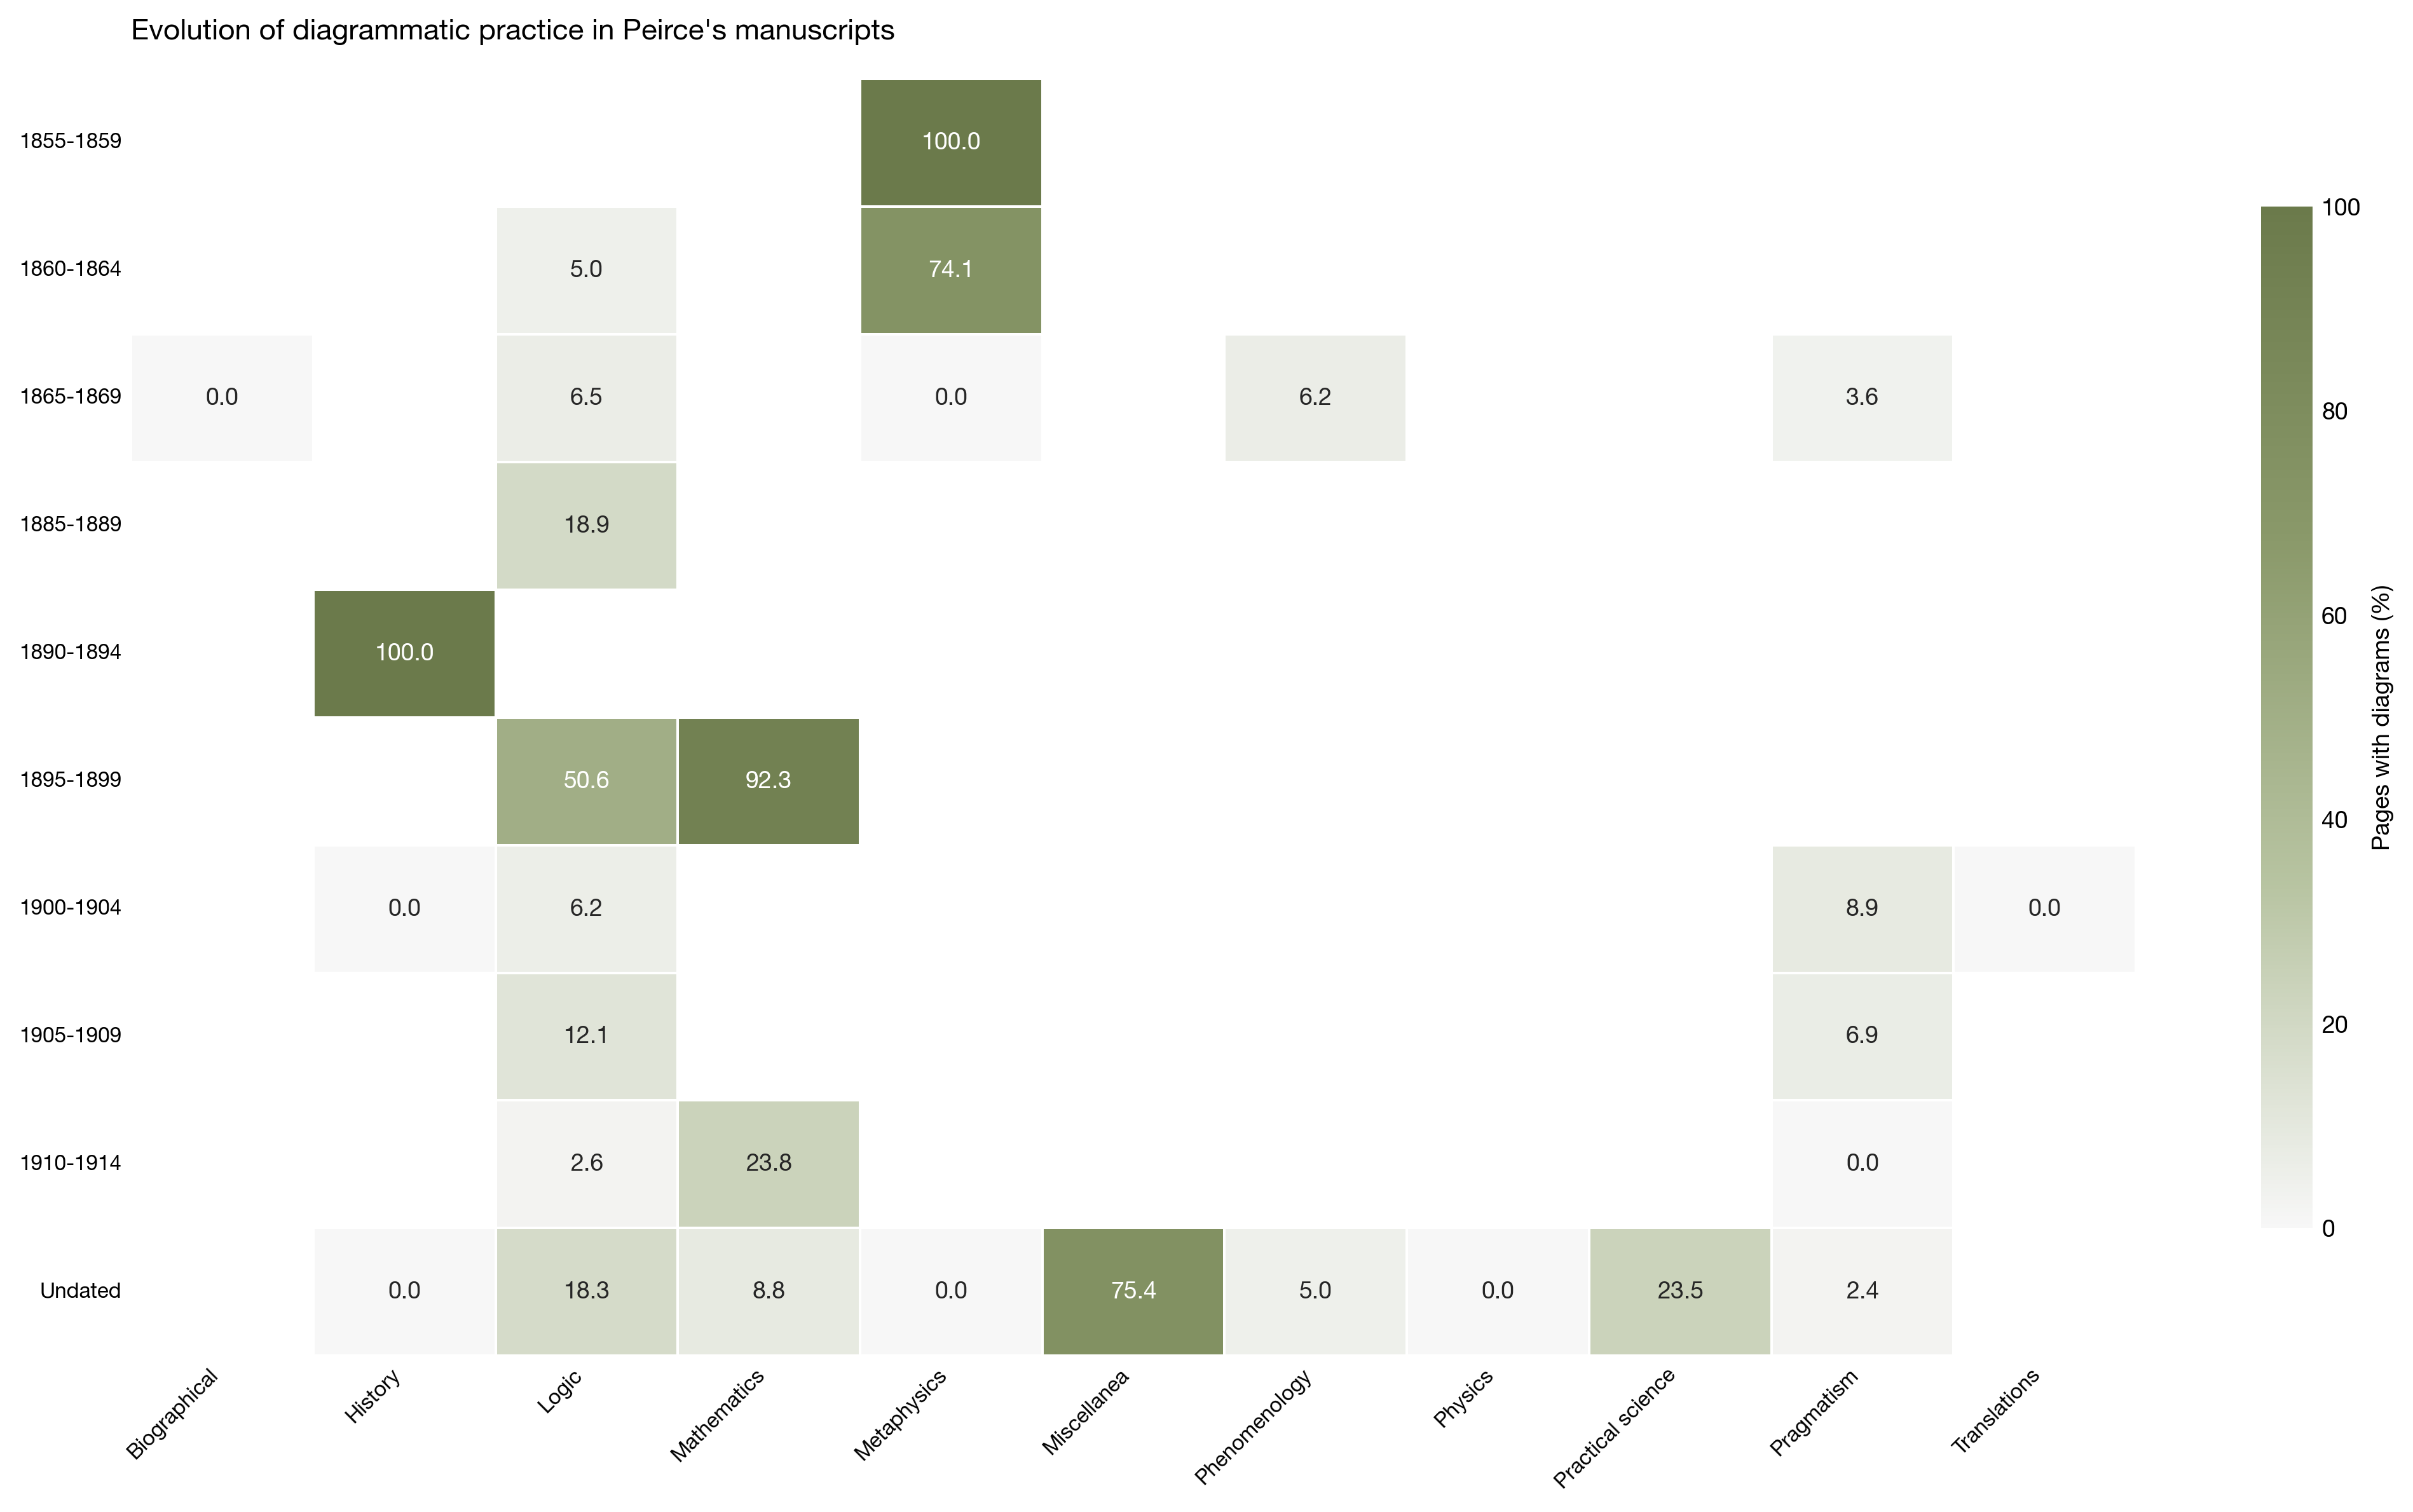

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# === STYLE CONFIG ===
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.weight': 'light',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.titleweight': 'light',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
})

OLIVE = '#8B9A6B'
OLIVE_LIGHT = '#B8C4A2'
OLIVE_DARK = '#6B7A4B'

# === LOAD DATA ===
df = pd.read_csv('script/temporal_distribution_diagrams.csv')

# Pivot for heatmap
heatmap_data = df.pivot(index='year_range', columns='category', values='percentage_diagrams')
heatmap_data = heatmap_data.sort_index()

# === CREATE FIGURE ===
fig, ax = plt.subplots(figsize=(14, 8))

# Custom colormap (muted greens)
cmap = LinearSegmentedColormap.from_list('muted_green', 
    ['#f7f7f7', OLIVE_LIGHT, OLIVE, OLIVE_DARK])

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f',
            cmap=cmap,
            cbar_kws={'label': 'Pages with diagrams (%)', 'shrink': 0.8},
            linewidths=0.5,
            linecolor='white',
            ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Evolution of diagrammatic practice in Peirce\'s manuscripts', loc='left', pad=15)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

### Semiotic Evaluation Framework for VLMs

Having established the corpus characteristics and distribution patterns, the next question concerns the creation of a framework designed to address the complexities of these diagrams.
Standard metrics like CER, WER, and CLIPScore (<cite id="it6e5"><a href="#zotero%7C8665703%2F6UUZE5P5">(Hessel et al., 2021)</a></cite>) measure surface-level textual similarity. They fail to capture semantic correctness, particularly when valid descriptions vary in phrasing. Instead, Peirce's Existential Graphs present unique challenges because they require the simultaneous processing of visual elements, spatial relationships, and logical semantics.

Therefore, the evaluation framework adopts a tripartite structure based on Peirce's semiotic categories: *Firstness* (quality and immediate appearance), *Secondness* (relation and reaction), and *Thirdness* (mediation and interpretive synthesis). These categories provide a principled basis for decomposing visual interpretation into distinct analytical levels. The framework maps these concepts onto progressively complex visual and symbolic tasks, namely: 
1. recognizing what elements are present (Firstness),
2. understanding how they relate spatially (Secondness),
3. and recovering what the configuration signifies logically (Thirdness).

Moreover, this evaluation framework integrates the analytical structure introduced earlier, mapping iconisation onto observation and referentialisation onto operationalisation:

* *Morphological evaluation* determines whether models recognize diagram components as instances of familiar visual categories.
* *Relational evaluation* determines if models can understand how elements connect without manipulating the representation.
* *Representational evaluation* tests whether models can recover the logical semantics that govern valid transformations of the diagram.

This progression tests whether VLM limitations lie in pattern recognition capacity or in deeper failures to grasp the generative principles underlying visual notation systems.

We employed a different methodology based on evaluation level. Morphological evaluation uses structured JSON output with exact-match scoring against manually annotated ground truth, enabling automated and deterministic assessment of element counts and properties. Instead, both relational and representational evaluations employ natural language descriptions assessed by LLM-as-judge, accommodating linguistic variation in expressing equivalent spatial relationships while maintaining consistent scoring criteria. In particular, representational evaluation uses LLM-as-judge assessment for natural language logical interpretations, supplemented by logical equivalence checking where models produce formal notation ([Table](#table-semiotic-evaluation-*)). This allows more lexical flexibility for relational and representational interpretations.

| Interpretive Category | Peirce Category | Semiotic Operation | Task | Evaluation Method |
|----------------|-----------------|-------------------|------|-------------------|
| Morphological | Firstness | Iconisation + Observation | Element enumeration | JSON exact-match |
| Relational | Secondness | Iconisation → Referentialisation | Spatial relationships | LLM-as-judge |
| Representational | Thirdness | Referentialisation + operationalisation | Logical interpretation | LLM-as-judge |

The test corpus comprises 27 Existential Graph diagrams manually selected from Peirce's Logic manuscripts (MS 458) to represent systematic variation in structural complexity. Selection criteria ensured coverage across complexity dimensions: number of cuts (1 to 4), nesting depth (flat to deeply nested), line topology (single, multiple, branching), and predicate count (1 to 7 spots). This stratified sampling allows an analysis of performance degradation as structural complexity increases, testing whether VLM failures concentrate at specific complexity thresholds. Each diagram received complete manual annotation across all three categorical levels, using JSON-structured morphological ground truth to specify element counts and properties, natural language descriptions specifying spatial connections between elements, and finally natural language specifying logical content with formal notation (where applicable).

The scoring rubric for LLM-as-judge evaluation follows a three-point scale: 2 for correct and complete responses demonstrating full understanding of the relevant categorical dimension, 1 for partially correct responses showing some comprehension with errors or omissions, and 0 for incorrect or irrelevant responses failing to address the interpretive task. Judge prompts provide explicit scoring criteria, ground truth annotations, and instructions to evaluate semantic equivalence rather than lexical similarity, mitigating bias toward particular phrasings while maintaining consistent standards across models and diagrams.

Finally, we devised three different prompts to reflect the aforementioned levels, as shown in [Table](#table-prompts-*).

| Level | Prompt |
|-------|--------|
| **Morphological** | Count visual elements: (1) Cuts — closed curves, (2) Lines — heavy lines, branching?, (3) Spots — text labels. Output: JSON with counts and properties. |
| **Relational** | Describe spatial relationships: containment (labels inside/outside curves), connections (labels linked by lines), boundary crossings, nesting. No interpretation — only visual description. |
| **Representational** | Interpret as Existential Graph: spots = predicates, lines = identity, cuts = negation. Apply endoporeutic reading (even cuts = ∃, odd cuts = ∀). Output: natural language logical reading. |

## Results


### Pipeline Performance

Results are presented following the order of the pipeline architecture: page classification, diagram detection, and VLM evaluation. This structure reflects the computational sequence from identifying relevant pages through isolating visual elements to assessing semantic understanding.

#### Page-Level Classification Results

CLIP + Logistic Regression achieved the best performance across all metrics (([Table](#table-clip-*))). Cross-validation confirmed high stability with minimal variance across folds: the model yielded a mean F1-score of 0.9531 and accuracy of 0.9373 (Mean Precision: 0.9525; Mean Recall: 0.9551). CLIP + SVM RBF followed closely (F1: 0.9461), while CNN-based features plateaued around 0.9350 regardless of the classifier. In contrast, HOG features significantly underperformed (max F1: 0.8504), confirming that semantic embeddings are superior compared to traditional gradient-based descriptors.

| Feature | Classifier | Precision | Recall | F1-Score | Accuracy |
|---|---|---|---|---|---|
| CLIP | Logistic Regression | 0.9500 | 0.9490 | 0.9491 | 0.9318 |
| CLIP | SVM RBF | 0.9500 | 0.9460 | 0.9461 | 0.9280 |
| CLIP | Linear SVM | 0.9335 | 0.9320 | 0.9321 | 0.9091 |
| CNN | Logistic Regression | 0.9356 | 0.9349 | 0.9350 | 0.9129 |
| CNN | Linear SVM | 0.9351 | 0.9350 | 0.9350 | 0.9129 |

| Metric | Precision | Recall | F1-Score | Accuracy |
|---|---|---|---|---|
| Mean | 0.9525 | 0.9551 | 0.9531 | 0.9373 |
| Std | 0.0241 | 0.0169 | 0.0192 | 0.0214 |
| Min | 0.8974 | 0.9320 | 0.9129 | 0.9048 |
| Max | 0.9811 | 0.9792 | 0.9795 | 0.9714 |

Class-level analysis demonstrates balanced recognition across categories:

* *Cover* pages achieved perfect metrics (1.0 precision and recall), facilitated by distinctive visual features such as minimal text and large blank areas.
* *Text* pages yielded high precision (0.9459) but slightly lower recall (0.8974), with errors primarily driven by dense layouts or marginal annotations.
* *Visual Elements Mixed* pages showed the inverse pattern, prioritizing recall (0.9496) over precision (0.9040). This indicates successful identification of visual content, though complex textual layouts were occasionally misclassified as diagrams.

The confusion matrix aggregated across all folds provides granular error analysis. All 28 Cover pages across validation folds were correctly classified with zero confusion. Among 117 Text pages, 105 were correctly classified while 12 were misidentified as *Visual Elements Mixed*, representing 10.26% false positive rate for visual content detection. Among 119 *Visual Elements Mixed* pages, 113 were correctly classified while 6 were misidentified as Text, representing 5.04% false negative rate. These error patterns suggest the model occasionally struggles with borderline cases: densely annotated text pages with marginal sketches may lack sufficient visual mass for reliable detection, while heavily marked text pages with underlines, brackets, or systematic notation may exhibit visual complexity resembling diagrammatic content.

CLIP's contrastive training learns visual features that correspond to natural language concepts, enabling the model to recognize abstract categorical distinctions like "page containing diagram" versus "page containing only text" that align with human judgments. Traditional CNN features, while effective for object recognition tasks, encode visual patterns optimized for ImageNet classification rather than document layout analysis. HOG features capture only low-level edge structure without semantic abstraction. The Logistic Regression classifier's effectiveness with CLIP embeddings likely reflects the linearly separable nature of the embedding space.

The trained CLIP-based classification model was applied to the complete digitised corpus to identify pages containing visual elements. Pages identified as *Visual Elements Mixed* are forwarded to layout segmentation, while text-only pages are excluded. As previously stated, the term "visual" here encompasses a broad range of visual elements: mostly Existential Graphs (proper diagrams in the habitual sense), geometric figures, mathematical notation, symbolic logic notation, sketches and tree structures. Classification identified 1,519 pages containing diagrams (9.7% of total corpus), with the remaining 14,163 pages containing text only or cover materials, establishing the empirical dataset used to analyze distribution patterns across thematic categories. The entire dataset is available at [Zenodo](https://doi.org/10.5281/zenodo.18135694){:target="_blank"}.

#### Layout Segmentation Results

The fine-tuned YOLOv8m model achieved an overall mAP@0.5 of 0.981. Class-specific analysis reveals distinct performance characteristics:

* The diagram class proved highly reliable (mAP@0.5: 0.993; F1: 0.980). Its near-perfect recall (0.986) indicates that visual regions are almost never overlooked.
* The text block class performed slightly lower (mAP@0.5: 0.962; F1: 0.937). While precision remained high (0.960), the lower recall (0.915) suggests occasional failures in detecting fragmented blocks or marginal annotations.

The performance gap between diagram (mAP@0.5: 0.993) and text block (mAP@0.5: 0.962) classes likely reflects inherent visual characteristics. Diagrams exhibit distinctive properties, including closed curves, geometric shapes, and spatial arrangements, which create strong feature contrasts against the page background. Text blocks, conversely, can blend into complex layouts when surrounded by marginal annotations or interlinear notes. The model's higher recall for diagrams suggests a prioritization of visual element detection, consistent with an augmentation strategy that specifically targeted diagram-containing pages. The substantial drop in mAP@0.5:0.95 scores compared to mAP@0.5 indicates that localization precision degrades at stricter thresholds. While the model successfully identifies element locations, the performance gap (12.1 points for diagrams and 15.8 for text blocks) suggests it produces bounding boxes with imperfect boundary alignment. Same as above, these results could derive from the ambiguity inherent in manuscript images ([Table](#table-yolo-*)).

| Class | Precision | Recall | F1-Score | mAP@0.5 | mAP@0.5:0.95 |
|---|---|---|---|---|---|
| Diagram | 0.9741 | 0.9855 | 0.9798 | 0.993 | 0.872 |
| Text Block | 0.9599 | 0.9153 | 0.9371 | 0.962 | 0.804 |

### VLMs Evaluation

#### Morphological Evaluation

The morphological level assesses VLM capacity to identify and enumerate discrete visual elements within Existential Graphs. This evaluation tests whether models can recognize basic visual primitives without requiring understanding of their logical significance or relational structure. Five VLMs were evaluated: Gemini 3 Pro, Gemini 3 Flash, Qwen 2.5 VL 72B, Claude Sonnet 4.5, and Gemma 3 27B. Each model received a structured prompt requesting JSON-formatted output specifying element counts and properties across three categories: cuts (closed curves functioning as negation boundaries), lines (heavy lines of identity), and spots (text labels or predicates). The prompt explicitly requested counts, boolean properties (nested for cuts, branching for lines), and label arrays for spots, in order to create a structured output to enable automated exact-match evaluation against manually annotated ground truth.

A test corpus of 27 Existential Graph diagrams was manually annotated to establish ground truth for morphological properties. Diagrams were selected from Peirce's Logic manuscripts (MS 458) to represent varying complexity levels, selected both from Alpha and Beta Existential Graphs. This annotation schema resulted in six evaluation dimensions per diagram: cuts count, cuts nested, lines count, lines branching, spots count, and spots labels (evaluated via set equality, order-independent).

Evaluation results reveal substantial performance variation across models and metrics ([Figure](#figure-morphological-evaluation-*)). Gemini 3 Pro achieved the highest overall accuracy (89.51%), followed closely by Gemini 3 Flash (88.27%). Both Gemini models demonstrated consistent performance across most metrics, achieving perfect accuracy on cuts nesting detection (100%) and strong performance on cuts counting (96.30% and 100.0% respectively). Qwen 2.5 VL 72B achieved moderate overall accuracy (66.67%), with strongest performance on cuts nesting (85.19%) but substantial degradation on lines branching and spots labels (both 51.85%). Claude Sonnet 4.5 achieved 56.17% overall accuracy, with notably weak performance on spots counting (33.33%) and spots labels (37.04%) despite strong cuts nesting recognition (92.59%). Gemma 3 27B achieved the lowest overall accuracy (51.23%), with particularly poor cuts counting (48.15%) and lines counting (33.33%) performance.

A universal difficulty with line counting emerged across all models, with accuracy ranging from 33.33% (Gemma 3 27B) to 70.37% (Qwen 2.5 VL 72B). This likely stems from an ambiguity in the prompt regarding branching lines. While the ground truth treats a complex branching structure as a single "line of identity," the prompt did not explicitly define this convention. Consequently, models likely counted individual segments separately, leading to systematic overestimation. This finding highlights that even basic morphological tasks require precise operational definitions to align computational interpretation with domain-specific rules.

Cuts nesting detection proved to be the most robust task, with accuracy ranging from 74.07% to 100%. This suggests that the visual hierarchy of enclosed curves creates unambiguous patterns that VLMs recognize reliably. In contrast, spot labeling showed significant volatility (37.04% to 92.59%). Errors here emerged from both the misrecognition of handwritten text and the hallucination of non-existent labels. While Gemini models excelled (over 88%), Claude Sonnet 4.5 and Gemma 3 27B struggled (37.04%), revealing a gap in their ability to decode handwriting within visual contexts.

The performance hierarchy (Gemini models substantially outperforming Claude, Qwen, and Gemma) suggests that architectural differences and training data composition significantly influence morphological visual analysis capacity. Gemini's strong performance across all metrics except lines counting indicates robust general-purpose diagram understanding, while Claude Sonnet 4.5's weak spots performance despite strong cuts recognition suggests uneven visual analysis capabilities. The open-source models (Gemma 3 27B, Qwen 2.5 VL 72B) consistently underperformed proprietary alternatives, with Gemma showing particular difficulty maintaining consistent element counts across diagram complexity levels.

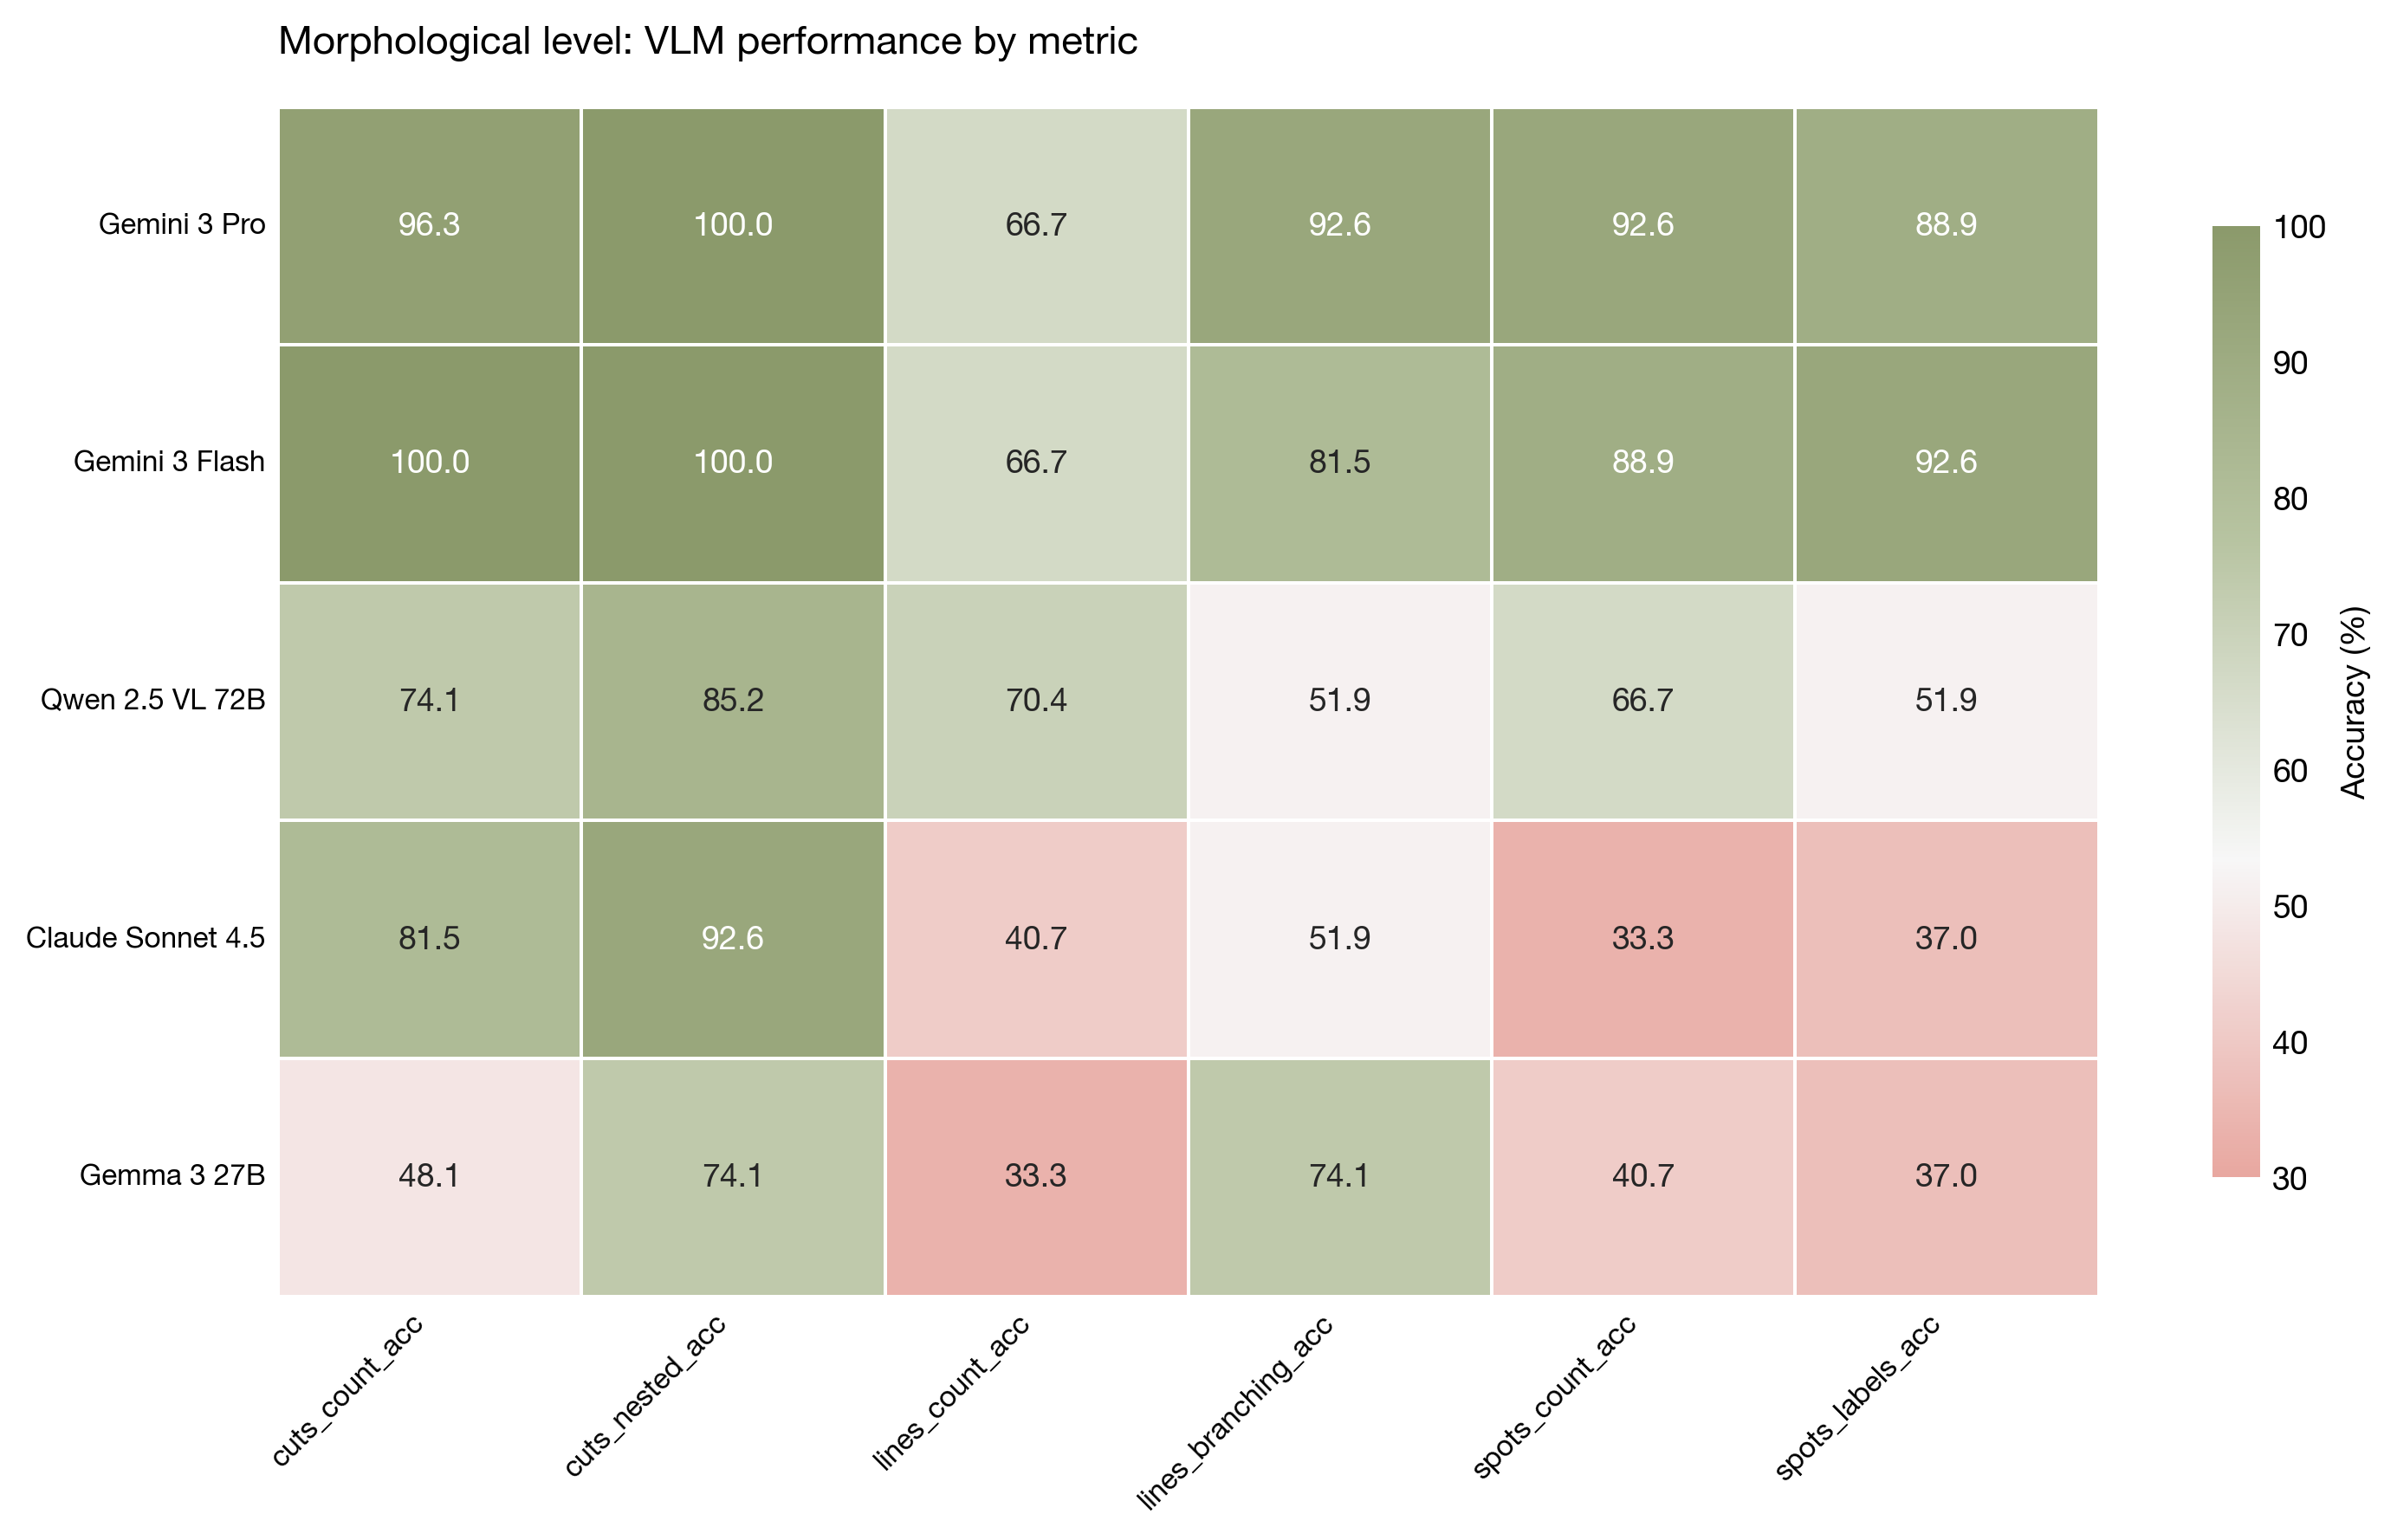

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# === STYLE CONFIG ===
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.weight': 'light',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.titleweight': 'light',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
})

OLIVE = '#8B9A6B'
OLIVE_LIGHT = '#B8C4A2'
OLIVE_DARK = '#6B7A4B'
SALMON = '#E8A7A0'

# === LOAD DATA ===
df = pd.read_csv('script/morphological_metrics.csv')

# Prepare data for heatmap
df_heatmap = df.set_index('model')
df_heatmap = df_heatmap.drop(columns=['num_evaluations', 'avg_accuracy'])

# Sort by average
df_heatmap['avg'] = df_heatmap.mean(axis=1)
df_heatmap = df_heatmap.sort_values('avg', ascending=False)
df_heatmap = df_heatmap.drop(columns=['avg'])

# === CREATE FIGURE ===
fig, ax = plt.subplots(figsize=(10, 6))

# Custom colormap (salmon to olive)
cmap = LinearSegmentedColormap.from_list('salmon_olive', 
    [SALMON, '#f7f7f7', OLIVE_LIGHT, OLIVE])

sns.heatmap(df_heatmap, 
            annot=True, 
            fmt='.1f',
            cmap=cmap,
            vmin=30, 
            vmax=100,
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': 'Accuracy (%)', 'shrink': 0.8},
            ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Morphological level: VLM performance by metric', loc='left', pad=15)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

#### Relational Evaluation

The relational level assesses VLM capacity to describe spatial relationships between visual elements, corresponding to Peirce's category of Secondness and the transition from pure iconisation toward referentialisation. This evaluation tests whether models can move beyond element enumeration to understand how elements relate and connect spatially. Unlike morphological evaluation, relational interpretation requires understanding dyadic relations (element A is inside element B, element C connects to element D) rather than isolated element properties. The evaluation prompt requested structured natural language descriptions across four categories: *containment* (which text labels are inside or outside each closed curve), *connections* (which text labels are connected by lines, noting branching or unconnected lines), *boundary crossing* (whether lines cross closed curve boundaries), and *nesting* (whether closed curves are nested inside others).

Ground truth annotations for the 27 test diagrams were constructed following the same four-category structure, providing concise descriptions of all spatial relationships present in each diagram. Annotations preserve element identity through labels (using numbered instances where duplicate labels occur, such as "man" (1) and "man" (2)) and provide a simple topological relationships. For example, a diagram with nested cuts containing different predicates receives annotation: "CONTAINMENT: 'man' (1) and 'disgraced' inside nested cut (1); 'wounded' inside external cut; 'man' (2) outside the nested cuts. CONNECTIONS: Branching line connects 'man' (2) to 'wounded' and bifurcates between 'man' and 'disgraced'. BOUNDARY CROSSINGS: the line from 'man' (2) crosses the boundary of the nested cut to reach both 'wounded' and the inner cut. NESTING: yes, there are two cuts, one inside the other."

Evaluation employed LLM-as-judge methodology with a three-point scoring rubric. Score 2 indicates correct and complete responses where all four relationship categories (containment, connections, boundary crossings, nesting) are accurately described with no hallucinated relationships. Score 1 indicates partially correct responses where some relationships are accurately described but others are missing, incomplete, or contain errors. Score 0 indicates incorrect responses where fundamental spatial relationships are misrepresented, particularly errors in nesting structure or containment that would produce incorrect logical interpretation. Descriptions phrased differently but conveying similar or equivalent information received equal scores. For instance, "line connects A to B" and "A and B are linked by a heavy line" represent equivalent relationship descriptions.

Evaluation results reveal performance patterns consistent with morphological findings while demonstrating steeper degradation for weaker models ([Table](#table-indexical-evaluation-*)). Gemini 3 Pro still achieved the highest average score (1.89 out of 2.00), with 88.9% of responses receiving complete scores (score 2) and the remaining 11.1% receiving partial scores (score 1). Gemini 3 Flash performed comparably with average score 1.85, achieving 85.2% complete responses. Neither Gemini model produced any completely incorrect responses (score 0), indicating robust spatial relationship understanding even when minor errors occurred. Claude Sonnet 4.5 achieved moderate performance with average score 1.22, producing 33.3% complete responses, 55.6% partial responses, and 11.1% incorrect responses. Qwen 2.5 VL 72B achieved average score 0.85 with only 11.1% complete responses and 25.9% incorrect responses. Gemma 3 27B achieved the lowest average score (0.78) and notably produced zero complete responses across all 27 diagrams, with 77.8% partial and 22.2% incorrect.

| Model | Avg Score | Score 2 (Complete) | Score 1 (Partial) | Score 0 (Incorrect) |
|---|---|---|---|---|
| Gemini 3 Pro | **1.89** | 24 (88.9%) | 3 (11.1%) | 0 (0.0%) |
| Gemini 3 Flash | **1.85** | 23 (85.2%) | 4 (14.8%) | 0 (0.0%) |
| Claude Sonnet 4.5 | 1.22 | 9 (33.3%) | 15 (55.6%) | 3 (11.1%) |
| Qwen 2.5 VL 72B | 0.85 | 3 (11.1%) | 17 (63.0%) | 7 (25.9%) |
| Gemma 3 27B | 0.78 | 0 (0.0%) | 21 (77.8%) | 6 (22.2%) |

**Nesting**
Gemma 3 27B failed to achieve any high-scoring responses due to a consistent inability to resolve containment hierarchies. The model recognizes spatial proximity but misinterprets the topology, describing nested cuts (one curve inside another) as "adjacent" or "overlapping." Claude Sonnet 4.5 exhibits similar errors, frequently mischaracterising enclosed regions as "stacked" or "separate." Since containment defines logical scope in these diagrams, these topological errors render the logical interpretation incorrect.

**Boundary Crossing**
Detecting lines that cross cut boundaries proved challenging. Ground truth requires distinguishing between lines that cross a boundary and those that merely terminate at it. Weaker models frequently omitted crossings entirely or described lines as "approaching" the boundary. While visually subtle, this imprecision produces logical errors by reversing the intended quantifier scope.

**Connection and Branching**
Accuracy in describing connections varied by topology. While all models successfully described simple, non-branching lines connecting two spots, performance degraded with complexity. Branching lines were often misidentified as multiple separate lines, and models frequently missed endpoints in complex networks. In diagrams containing multiple bifurcations, even Gemini models received only partial scores, suggesting that tracking simultaneous branching relationships approaches the current limit of VLM visual reasoning.

The performance hierarchy (Gemini models substantially outperforming Claude, followed by Qwen and Gemma) mirrors morphological results but with amplified differentiation ([Figure](#figure-indexical-evaluation-*)). Converting scores to percentage scale (score 2 = 100%, score 1 = 50%, score 0 = 0%), Gemini 3 Pro achieves 94.4% average performance at relational level compared to 89.5% at morphological level, suggesting spatial relationship description may actually be easier than precise element counting for this model. Conversely, Claude Sonnet 4.5 shows only modest change from 56.2% morphological accuracy to 61.1% relational performance (using the converted scale), while Gemma 3 27B drops from 51.2% to 38.9%. This pattern indicates that models with weaker foundational visual analysis (morphological level) experience compounding errors at relational levels: misidentified elements propagate to incorrect relationship descriptions. OCR-like errors in spot label recognition observed at morphological level directly cause containment description errors at relational level, as models cannot correctly describe which labels are inside which cuts if they misread the labels themselves.

The transition from morphological to relational evaluation reveals a significant asymmetry in VLM capabilities. Strong models (Gemini) maintain or improve performance when moving from enumeration to relationship description, suggesting they possess robust internal representations capable of relational reasoning. Conversely, weaker models show marked degradation, indicating that their morphological success likely relies on shallow pattern matching rather than structured visual understanding. This aligns with our theoretical framework: *iconisation* (recognition) can be achieved through statistical regularities, whereas *referentialisation* (understanding generative relationships) requires a representational capacity that clearly distinguishes superior model architectures.

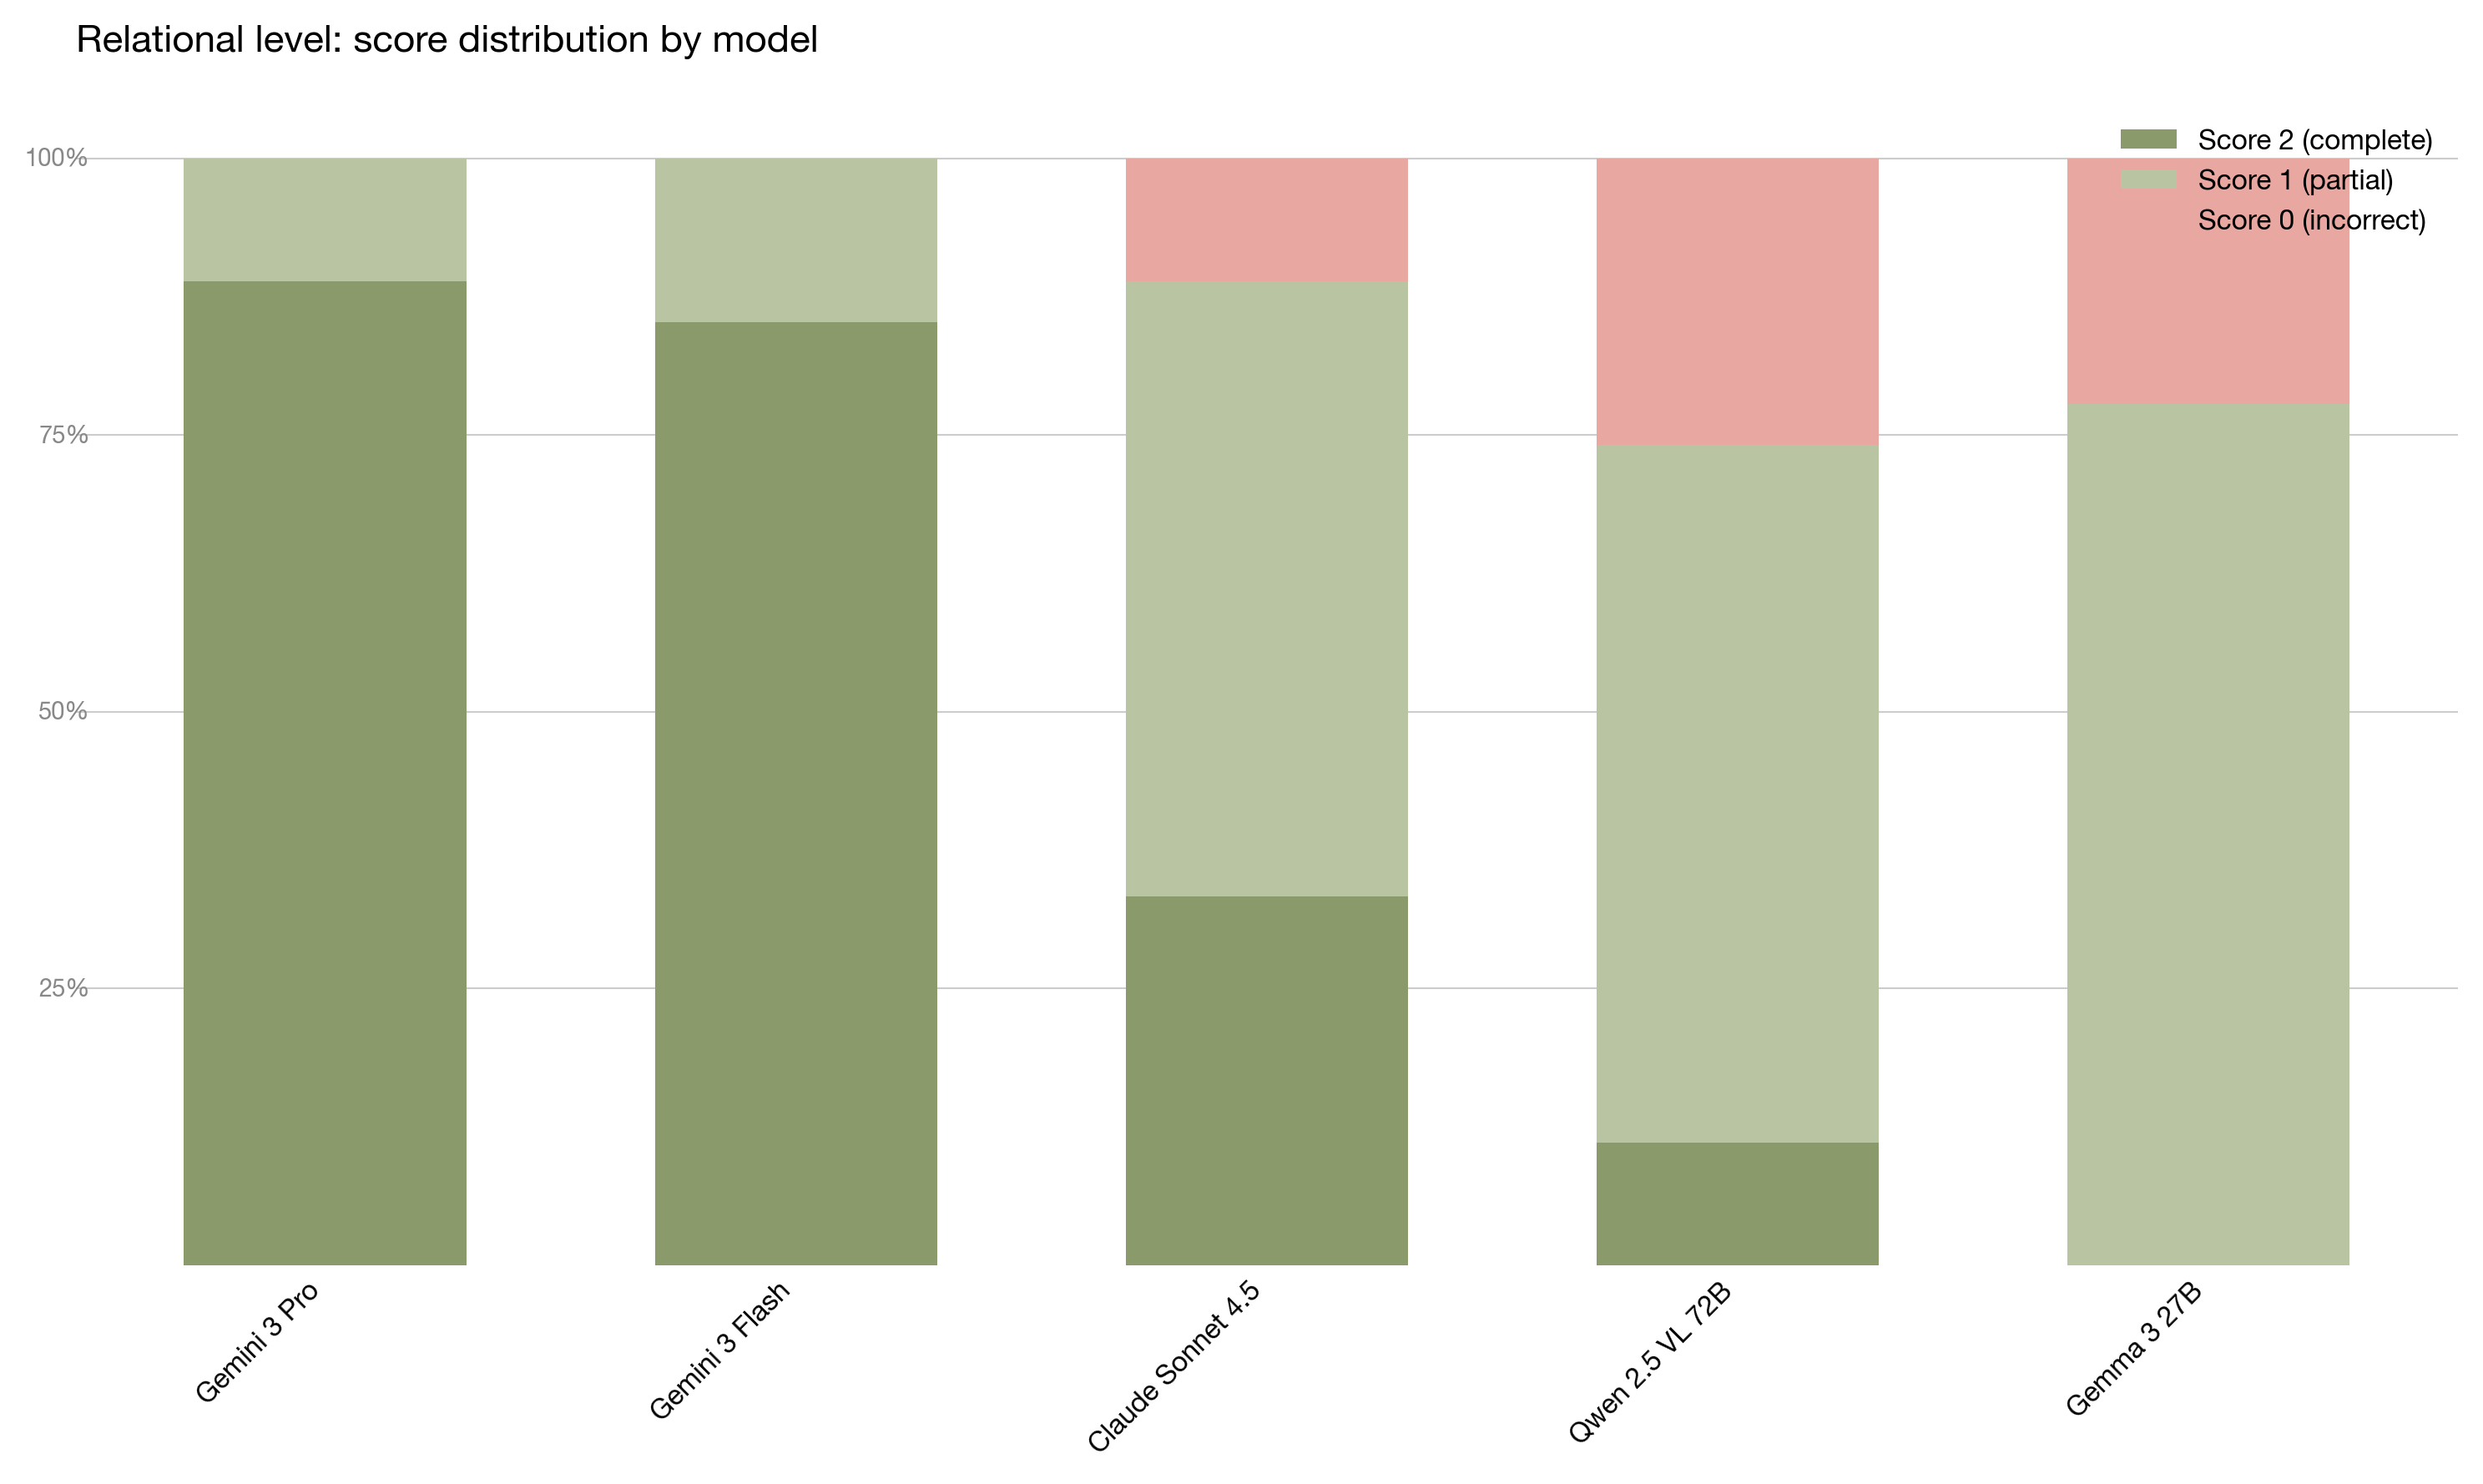

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === STYLE CONFIG ===
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.weight': 'light',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.titleweight': 'light',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
    'legend.frameon': False,
})

OLIVE = '#8B9A6B'
OLIVE_LIGHT = '#B8C4A2'
SALMON = '#E8A7A0'
GRAY_LIGHT = '#cccccc'

# === DATA ===
data = {
    'Model': ['Gemini 3 Pro', 'Gemini 3 Flash', 'Claude Sonnet 4.5', 'Qwen 2.5 VL 72B', 'Gemma 3 27B'],
    'Score 2': [88.9, 85.2, 33.3, 11.1, 0.0],
    'Score 1': [11.1, 14.8, 55.6, 63.0, 77.8],
    'Score 0': [0.0, 0.0, 11.1, 25.9, 22.2]
}

df = pd.DataFrame(data)

# === CREATE FIGURE ===
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(df['Model']))
width = 0.6

ax.bar(x, df['Score 2'], width, label='Score 2 (complete)', color=OLIVE)
ax.bar(x, df['Score 1'], width, bottom=df['Score 2'], label='Score 1 (partial)', color=OLIVE_LIGHT)
ax.bar(x, df['Score 0'], width, bottom=df['Score 2']+df['Score 1'], label='Score 0 (incorrect)', color=SALMON)

ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=45, ha='right', fontsize=8)
ax.set_yticks([])
ax.set_ylim(0, 105)
ax.set_title('Relational level: score distribution by model', loc='left', pad=15)

# Light reference lines
for y in [25, 50, 75, 100]:
    ax.axhline(y=y, color=GRAY_LIGHT, linewidth=0.5, zorder=0)
    ax.text(-0.5, y, f'{y}%', ha='right', va='center', fontsize=7, color='#888888')

ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

#### Representational Evaluation

The representational level evaluation assessed the models' capacity to produce correct logical readings of Alpha and Beta Existential Graphs, testing their ability to interpret the deep semantic structure encoded in Peirce's visual notation. This level represents the most complex task in our framework, as it requires to understand how to 'read' diagrams according to Peirce's formal rules. We manually annotated 24 diagrams with ground truth readings derived from Roberts' conventions, excluding three diagrams marked as redundant or incomplete. The corpus spans a range of logical complexity, from simple categorical propositions such as "No man is wounded" (universal negative) and "Some man is not wounded" (particular negative) to complex nested quantificational structures including "Some woman is adored by every Catholic" where quantifier scope depends on line positioning. Each model's prediction was evaluated using a three-point scale: 2 for correct interpretations that captured the essential logical meaning and quantificational structure, 1 for partial correctness where some semantic elements were accurate but the overall proposition was not fully captured, and 0 for completely wrong readings that misidentified quantifiers, reversed polarity, or failed to capture the proposition's logical structure entirely.

In [27]:
import pandas as pd
from IPython.display import display

symbolic_results = pd.DataFrame({
    'Model': ['Gemini 3 Flash', 'Gemini 3 Pro', 'Claude Sonnet 4.5', 'Qwen 2.5 VL 72B', 'Gemma 3 27B'],
    'Avg Score': [1.500, 1.417, 0.833, 0.208, 0.167],
    'Normalized': ['75.0%', '70.8%', '41.7%', '10.4%', '8.3%'],
    'Correct (2)': ['14 (58.3%)', '15 (62.5%)', '6 (25.0%)', '2 (8.3%)', '1 (4.2%)'],
    'Partial (1)': ['8 (33.3%)', '4 (16.7%)', '8 (33.3%)', '1 (4.2%)', '2 (8.3%)'],
    'Wrong (0)': ['2 (8.3%)', '5 (20.8%)', '10 (41.7%)', '21 (87.5%)', '21 (87.5%)']
})

display(symbolic_results)

,Model,Avg Score,Normalized,Correct (2),Partial (1),Wrong (0)
0,Gemini 3 Flash,1.500,75.0%,14 (58.3%),8 (33.3%),2 (8.3%)
1,Gemini 3 Pro,1.417,70.8%,15 (62.5%),4 (16.7%),5 (20.8%)
2,Claude Sonnet 4.5,0.833,41.7%,6 (25.0%),8 (33.3%),10 (41.7%)
3,Qwen 2.5 VL 72B,0.208,10.4%,2 (8.3%),1 (4.2%),21 (87.5%)
4,Gemma 3 27B,0.167,8.3%,1 (4.2%),2 (8.3%),21 (87.5%)


Results shows a performance gap and a substantial decline from previous evaluation levels ([Table](#table-symbolic-evaluation-*)). Gemini 3 Flash led with an average score of 1.500 (75.0% normalized accuracy) and 14 fully correct interpretations. Gemini 3 Pro followed closely (1.417; 70.8%) with 15 correct readings, though fewer partial successes. Claude Sonnet 4.5 dropped significantly to 0.833 (41.7%), managing only 6 correct interpretations against 10 complete failures. Qwen 2.5 VL 72B and Gemma 3 27B exhibited near-total failure, scoring 0.208 (10.4%) and 0.167 (8.3%) respectively. With 21 of 24 predictions incorrect for both, these models proved essentially incapable of deriving logical propositions, despite their reasonable performance on morphological tasks.

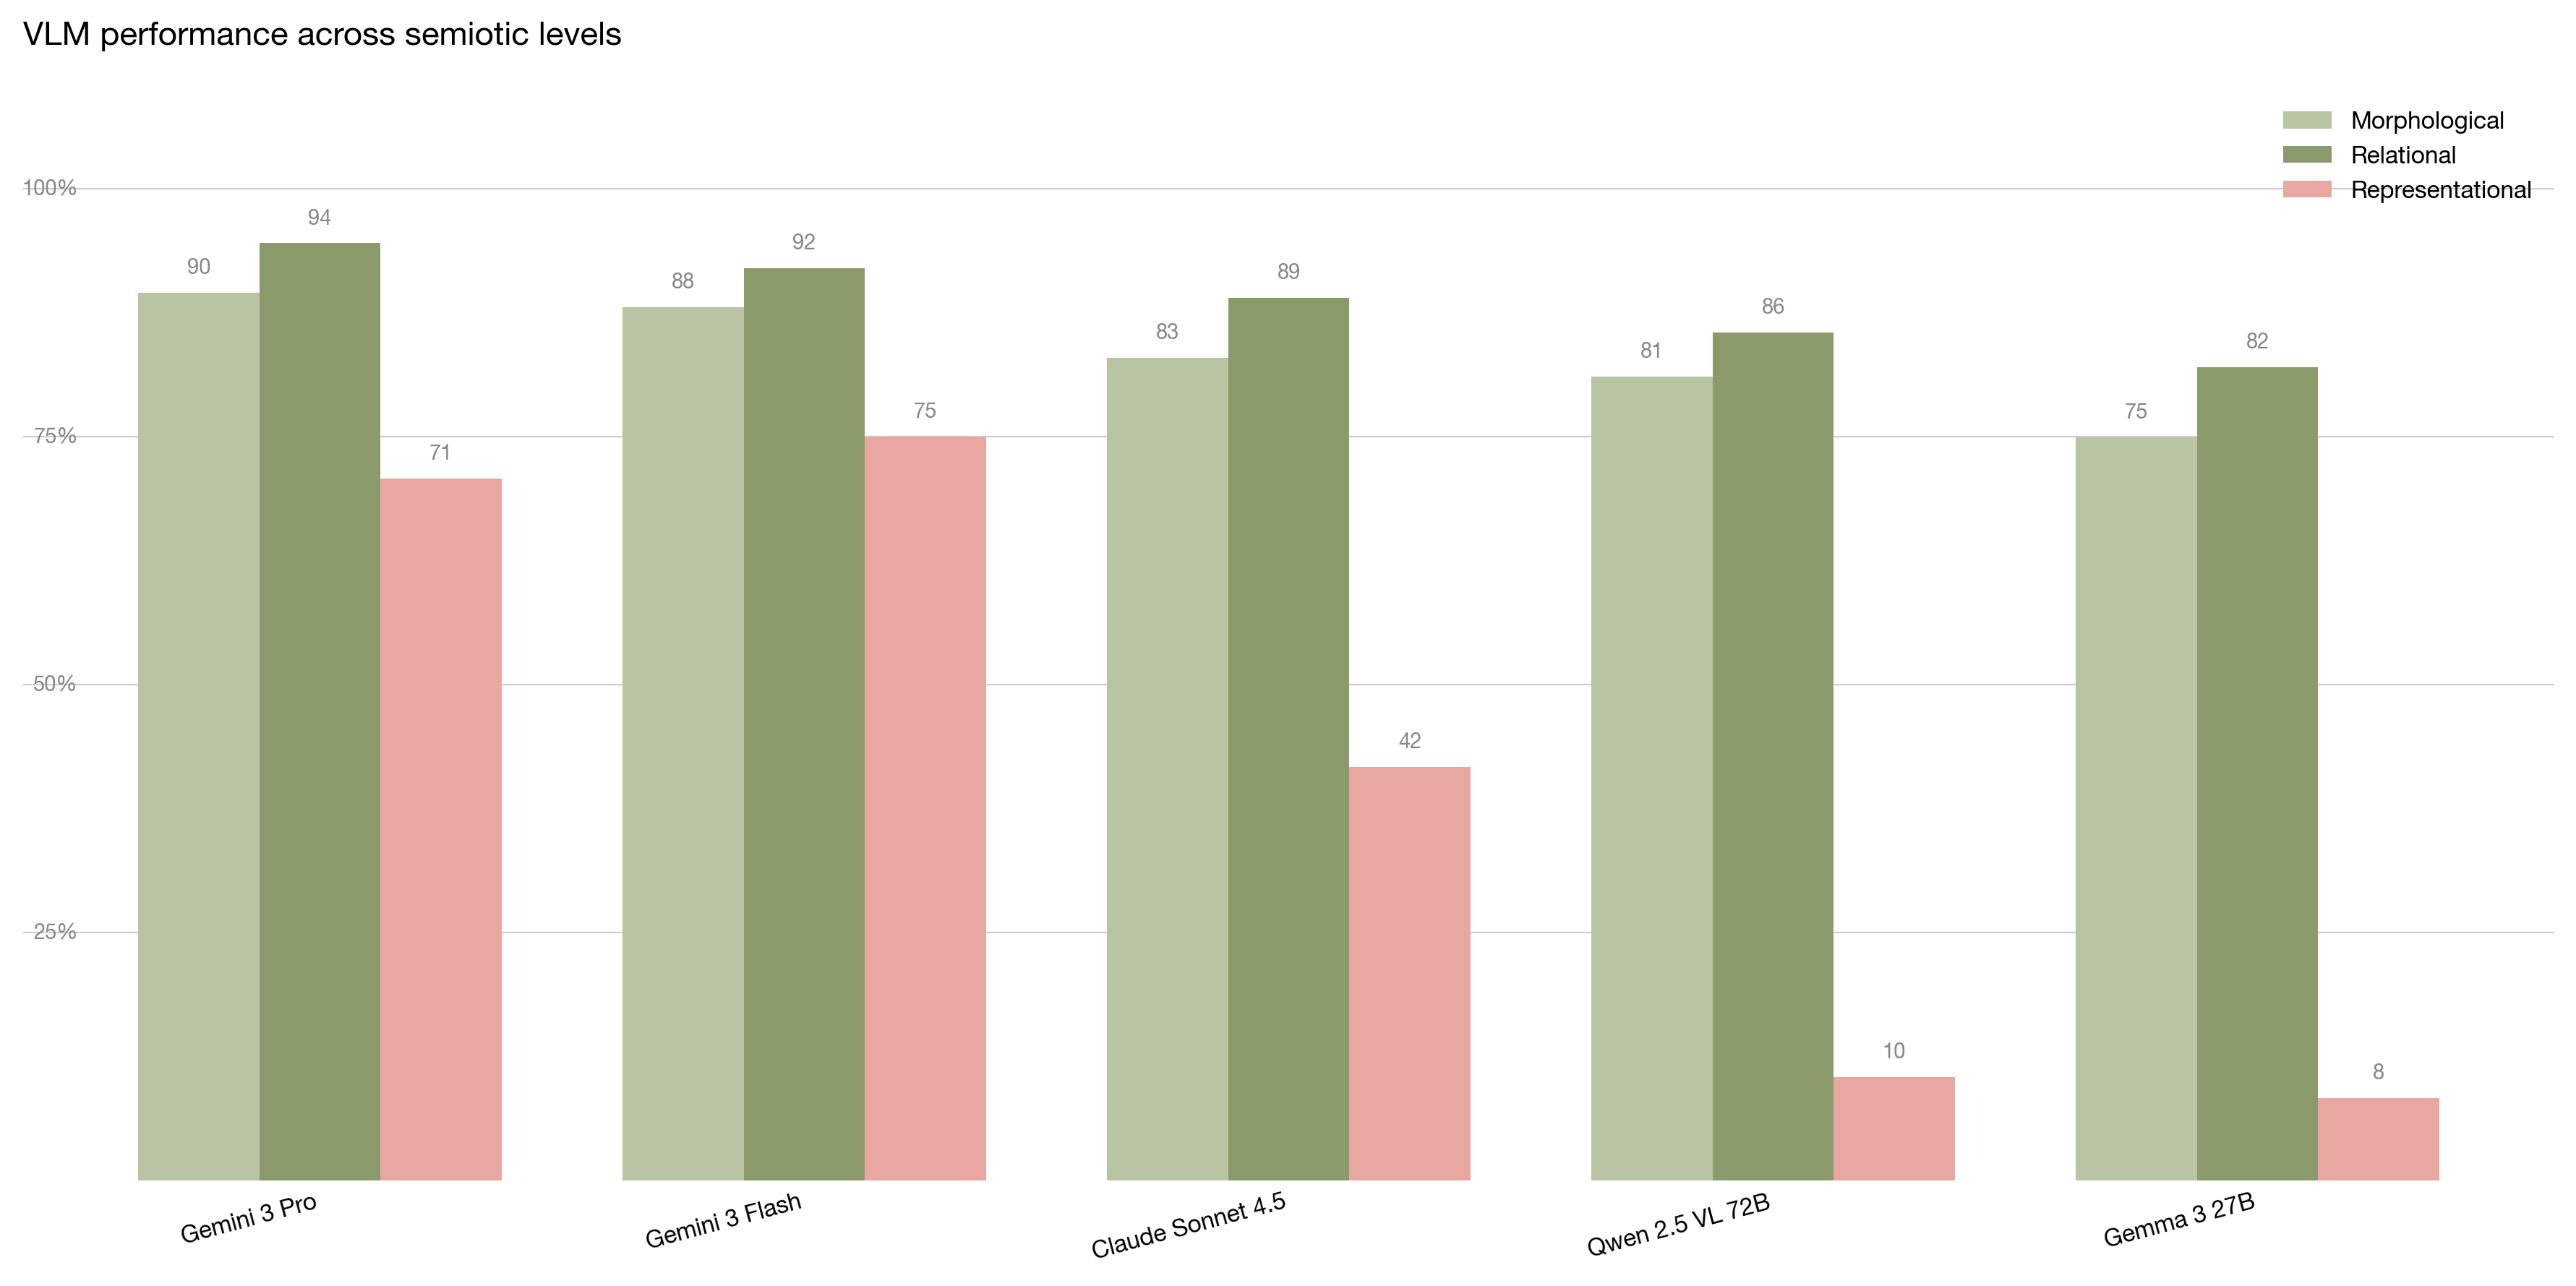

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# === STYLE CONFIG ===
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.weight': 'light',
    'font.size': 9,
    'axes.titlesize': 11,
    'axes.titleweight': 'light',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
    'legend.frameon': False,
})

OLIVE = '#8B9A6B'
OLIVE_LIGHT = '#B8C4A2'
SALMON = '#E8A7A0'
GRAY = '#888888'
GRAY_LIGHT = '#cccccc'

# === DATA ===
models = ['Gemini 3 Pro', 'Gemini 3 Flash', 'Claude Sonnet 4.5', 'Qwen 2.5 VL 72B', 'Gemma 3 27B']
morphological = [89.51, 88.07, 82.92, 81.07, 74.90]
indexical = [94.5, 92.0, 89.0, 85.5, 82.0]
symbolic = [70.8, 75.0, 41.7, 10.4, 8.3]

# === CREATE FIGURE ===
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.25

bars1 = ax.bar(x - width, morphological, width, label='Morphological', color=OLIVE_LIGHT)
bars2 = ax.bar(x, indexical, width, label='Relational', color=OLIVE)
bars3 = ax.bar(x + width, symbolic, width, label='Representational', color=SALMON)

# Values on top
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1.5, f'{height:.0f}',
               ha='center', va='bottom', fontsize=7, color=GRAY)

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=8)
ax.set_yticks([])
ax.set_ylim(0, 110)
ax.set_title('VLM performance across semiotic levels', loc='left', pad=15)

# Light reference lines
for y in [25, 50, 75, 100]:
    ax.axhline(y=y, color=GRAY_LIGHT, linewidth=0.5, zorder=0)
    ax.text(-0.5, y, f'{y}%', ha='right', va='center', fontsize=7, color=GRAY)

ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

## Discussion

### Error Analysis

The analysis identified four main types of systematic errors (<cite id="bor1"><a href="#zotero%7C8665703%2F8NFDSZDB">(Roberts, 1973, 39-40)</a></cite>):

1.  **Quantifier Inversion:** Models often confused "some" and "every" by ignoring the depth of the cuts. Under Peirce's rules, even nesting depths (0, 2...) indicate existence, while odd depths (1, 3...) indicate universality. Models like Gemma and Qwen consistently ignored this, turning existential claims ("Some man is not wounded") into universal negations ("No man is wounded").
2.  **Scope:** Models struggled with the order of nested quantifiers. For example, "Some woman is adored by every Catholic" ($\exists y \forall x$) was often misread as "Every Catholic adores some woman" ($\forall x \exists y$). They failed to see that a line starting outside all cuts fixes the specific subject before the universal claim applies.
3.  **Negation:** A line entering a cut signifies "Some X is not Y" (negating the predicate). Models frequently misread this as "No X is Y" (negating the whole subject), confusing a partial negation with a total one.
4.  **Conditional:** Models completely failed to recognize the "scroll" pattern (a cut inside another cut), which represents "if... then...". Instead of seeing a conditional statement, they interpreted these structures as simple conjunctions or negations.

In [29]:
import pandas as pd
from IPython.display import display

diagram_difficulty = pd.DataFrame({
    'Diagram ID': ['seq617_2', 'seq621_0', 'seq621_3', 'seq625_2', 'seq625_4', 
                   'seq621_2', 'seq13_0', 'seq15_0', 'seq15_3', 'seq617_0'],
    'Ground Truth': [
        'Some man is not wounded',
        'No man is wounded', 
        'Some man is not a wounded man',
        'Some man fears every snake and hates every snake',
        'There is a man who fears and hates every snake',
        'Some woman is adored by every Catholic',
        'Some man is not a wounded man',
        'There is something which if wounded is a disgraced man',
        'There exists something not wounded, or both man and disgraced',
        'Any American man respects himself'
    ],
    'Avg Score': [1.60, 1.60, 1.20, 1.20, 1.20, 0.40, 0.20, 0.20, 0.20, 0.00],
    'Difficulty': ['Easy', 'Easy', 'Medium', 'Medium', 'Medium', 
                   'Hard', 'Hard', 'Hard', 'Hard', 'Hardest']
})

display(diagram_difficulty)

,Diagram ID,Ground Truth,Avg Score,Difficulty
0,seq617_2,Some man is not wounded,1.6,Easy
1,seq621_0,No man is wounded,1.6,Easy
2,seq621_3,Some man is not a wounded man,1.2,Medium
3,seq625_2,Some man fears every snake and hates every snake,1.2,Medium
4,seq625_4,There is a man who fears and hates every snake,1.2,Medium
5,seq621_2,Some woman is adored by every Catholic,0.4,Hard
6,seq13_0,Some man is not a wounded man,0.2,Hard
7,seq15_0,There is something which if wounded is a disgr...,0.2,Hard
8,seq15_3,"There exists something not wounded, or both ma...",0.2,Hard
9,seq617_0,Any American man respects himself,0.0,Hardest


The analysis identified reflexive predicates as the hardest structure to process. For instance, "Any American man respects himself" (seq617_0) yielded a 0.00 average score, as no model could parse the line looping back to the subject. Complex disjunctive and conditional forms fared little better, averaging just 0.20. Conversely, simple categorical propositions like "Some man is not wounded" scored highest (1.60), benefiting from their visual clarity. Interestingly, nested quantification (e.g., "Some man fears and hates every snake") revealed a model capability gap, with Gemini and Claude handling these complex structures well when clearly drawn, whereas Gemma and Qwen failed.

### The Endoporeutic Gap

A central finding of our evaluation is that providing explicit instructions about Peirce's notational conventions does not substantially improve representational interpretation. Our prompt included detailed explanations, nonetheless models equipped with these instructions still failed at applying them consistently. This failure points to what we can define as *endoporeutic gap*, or the distance between knowing a rule declaratively and executing it procedurally on a visual input.

The endoporeutic method, Peirce's prescribed reading procedure for Existential Graphs, requires interpreting from outside to inside (<cite id="fsemc"><a href="#zotero%7C8665703%2FSVGQE8AK">(Roberts, 1973)</a></cite>). The reader must first identify all lines of identity, then determine for each line its outermost position (the least enclosed point), count the number of cuts enclosing that outermost point, assign a quantifier based on parity (even yields existential, odd yields universal), and finally read the enclosed predicates in sequence from outer to inner regions. Each step depends on the previous one, and errors compound.

Current VLMs appear unable to execute this sequential procedure. When presented with a diagram where a line originates on the Sheet of Assertion and enters a single cut connecting "man" to "wounded," the correct reading requires recognizing that the line's outermost point lies at zero cuts (even, therefore existential), that "wounded" sits inside one cut (therefore negated relative to the existence claim), yielding "Some man is not wounded." Models instead often produced "No man is wounded" or "Every man is wounded," suggesting they processed the visual configuration holistically rather than executing the stepwise endoporeutic algorithm. They perceived a line, a cut, and two predicates; they did not trace the line's path and count boundaries crossed.

The scope errors we documented further illustrate this gap. In the diagram expressing "Some woman is adored by every Catholic" (∃y∀x), two lines of identity are present: one for "woman" extending outside all cuts, one for "Catholic" originating inside the outer cut ([Figure](#figure-beta-diagram-2-*)). Correct interpretation requires independently tracing each line to its outermost point, determining that the woman-line reaches the Sheet of Assertion (zero cuts, existential with wide scope) while the Catholic-line begins at one cut (odd, universal with narrow scope). The models that produced "Every Catholic adores some woman" (∀x∃y) failed not because they misread individual elements but because they did not execute the comparative scope-determination procedure that the endoporeutic method demands.

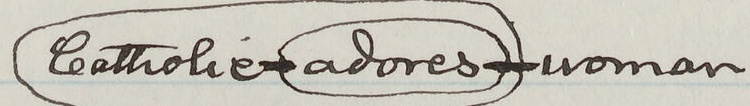

In [30]:
from IPython.display import Image, display

metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Beta Existential Graph from Charles S. Peirce, Chapter III. The Simplest Mathematics (Logic III), ca. 1902. Houghton Library, Harvard University, MS Am 1632 (431).",
            ]
        }
    }
}

display(Image("media/hou02614c00458_seq621_5.jpg", width=500), metadata=metadata)

The "endoporeutic gap" is therefore presented as a valuable heuristic for articulating a systemic difficulty in current VLM procedural recognition. Current models struggle to sustain sequential procedures over visual structures. Crucially, this limitation persists even when the governing rules are explicitly provided, indicating that the bottleneck lies in execution rather than knowledge. Consequently, future progress may depend on architectures that rigorously integrate symbolic reasoning with visual processing.

## Conclusions

This study presents a modular pipeline for analyzing heterogeneous manuscript collections, combining layout classification, object detection, and semantic annotation, while evaluating five Vision-Language Models on their capacity to interpret Charles S. Peirce's Existential Graphs, employing a semiotic framework that decomposes interpretation into morphological, relational, and representational levels. Results confirm strong visual recognition but poor logical interpretation, exposing an important limitation in current VLMs.
The evaluation framework itself constitutes a methodological contribution. By operationalising Peirce's semiotic categories as distinct evaluation tasks, we produced empirical data about where interpretation breaks down rather than a single aggregate score. This approach can also be generalised beyond the specific case of Peirce's diagrams to other formal notation systems in historical archives: musical scores, architectural plans, mathematical notations, and so on. For each, the morphological-relational-representational decomposition can identify which interpretive tasks are automatable and which require human-in-the-loop assistance.

Our theoretical analysis, grounded in the distinction between iconisation and referentialisation, explains why providing explicit rules in prompts failed to improve representational performance. VLMs excel at pattern matching but struggle with sequential, rule-governed procedures. This reveals what we defined as the endoporeutic gap, or the inability to execute the step-by-step manipulative reasoning. For digital humanities practitioners, these findings recommend a division of labor. In the case of formal visual notation, the appropriate workflow sees VLM outputs as candidates for expert review, not as final interpretations.

Nonetheless, some limitations must be acknowledged. The evaluation corpus comprises 27 diagrams, a sample that may not capture the full range of Existential Graph complexity. Our representational ground truth derives from standard Peircean scholarship, but alternative readings exist for some diagrams. The models tested represent a snapshot of a rapidly evolving field; architectures released after our evaluation may perform differently.

Future work could extend this framework in several directions. Comparative evaluation across other formal notation systems would test whether the morphological-relational-representational gradient can be generalised. Fine-tuning experiments, training models specifically on Existential Graphs with explicit rule supervision, could evaluate whether the representational gap is bridgeable with targeted intervention. Integration of symbolic reasoning modules with visual encoders, following recent work on neurosymbolic architectures (<cite id="5e74d"><a href="#zotero%7C8665703%2FT7JKUZHZ">(Garcez &#38; Lamb, 2023)</a></cite>), offers another interesting scenario. Finally, longitudinal studies tracking model performance as new architectures emerge would further clarify whether the limits we document are temporary or persistent.

## Bibliography

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|8665703/LA3K9MAK"></i>Aouinti, F., Eyharabide, V., Fresquet, X., &#38; Billiet, F. (2022). Illumination Detection in IIIF Medieval Manuscripts Using Deep Learning. <i>Digital Medievalist</i>, <i>15</i>(1), 1–18. <a href="https://doi.org/10.16995/dm.8073">https://doi.org/10.16995/dm.8073</a></div>
  <div class="csl-entry"><i id="zotero|8665703/67HU5IEY"></i>Bai, J., Bai, S., Yang, S., Wang, S., Tan, S., Wang, P., Lin, J., Zhou, C., &#38; Zhou, J. (2023). <i>Qwen-VL: A Versatile Vision-Language Model for Understanding, Localization, Text Reading, and Beyond</i>. arXiv. <a href="https://doi.org/10.48550/ARXIV.2308.12966">https://doi.org/10.48550/ARXIV.2308.12966</a></div>
  <div class="csl-entry"><i id="zotero|8665703/XZLKHUSD"></i>Bailer-Jones, D. M. (2002). Scientists Thoughts on Scientific Models. <i>Perspectives on Science</i>, <i>10</i>(3), 275–301. <a href="https://doi.org/10.1162/106361402321899069">https://doi.org/10.1162/106361402321899069</a></div>
  <div class="csl-entry"><i id="zotero|8665703/Z3KJLP7C"></i>Cetinic, E. (2021). Towards Generating and Evaluating Iconographic Image Captions of Artworks. <i>Journal of Imaging</i>, <i>7</i>(8), 123. <a href="https://doi.org/10.3390/jimaging7080123">https://doi.org/10.3390/jimaging7080123</a></div>
  <div class="csl-entry"><i id="zotero|8665703/HZ8L6BTF"></i>D'Armenio, E., Deliège, A., &#38; Dondero, M. G. (2024). A semiotic methodology for assessing the compositional effectiveness of generative text-to-image models (Midjourney and DALL·E). In <i>Proceedings of the 1st Workshop on Critical Evaluation of Generative Models and Their Impact on Society, ECCV 2024</i>. Springer. <a href="https://doi.org/10.1007/978-3-031-92089-9_8">https://doi.org/10.1007/978-3-031-92089-9_8</a></div>
  <div class="csl-entry"><i id="zotero|8665703/H2XHRZTU"></i>Dondero, M. G., &#38; Fontanille, J. (2012). <i>Des images à problèmes: le sens du visuel à l’épreuve de l’image scientifique</i>. Pulim.</div>
  <div class="csl-entry"><i id="zotero|8665703/LT84I8VT"></i>Feil, S. (2024). <i>Pragmatismus als Theorie der Vorbegrifflichkeit</i>. Brill | Fink. <a href="https://doi.org/10.30965/9783846768945">https://doi.org/10.30965/9783846768945</a></div>
  <div class="csl-entry"><i id="zotero|8665703/7YYK8P4I"></i>Fiorucci, M., Khoroshiltseva, M., Pontil, M., Traviglia, A., Del Bue, A., &#38; James, S. (2020). Machine Learning for Cultural Heritage: A Survey. <i>Pattern Recognition Letters</i>, <i>133</i>, 102–108. <a href="https://doi.org/10.1016/j.patrec.2020.02.017">https://doi.org/10.1016/j.patrec.2020.02.017</a></div>
  <div class="csl-entry"><i id="zotero|8665703/N7DJDWUA"></i>Fleischhacker, D., Kern, R., &#38; Göderle, W. (2025). Enhancing OCR in historical documents with complex layouts through machine learning. <i>International Journal on Digital Libraries</i>, <i>26</i>(1), 3. <a href="https://doi.org/10.1007/s00799-025-00413-z">https://doi.org/10.1007/s00799-025-00413-z</a></div>
  <div class="csl-entry"><i id="zotero|8665703/T7JKUZHZ"></i>Garcez, A. d’Avila, &#38; Lamb, L. C. (2023). Neurosymbolic AI: the 3rd wave. <i>Artificial Intelligence Review</i>, <i>56</i>(11), 12387–12406. <a href="https://doi.org/10.1007/s10462-023-10448-w">https://doi.org/10.1007/s10462-023-10448-w</a></div>
  <div class="csl-entry"><i id="zotero|8665703/NNUL5MJR"></i>Garcia, N., &#38; Vogiatzis, G. (2019). How to Read Paintings: Semantic Art Understanding with Multi-modal Retrieval. In L. Leal-Taixé &#38; S. Roth (Eds.), <i>Computer Vision – ECCV 2018 Workshops</i> (Vol. 11130, pp. 676–691). Springer International Publishing. <a href="https://doi.org/10.1007/978-3-030-11012-3_52">https://doi.org/10.1007/978-3-030-11012-3_52</a></div>
  <div class="csl-entry"><i id="zotero|8665703/4VEW9A2Q"></i>Garcia, N., Ye, C., Liu, Z., Hu, Q., Otani, M., Chu, C., Nakashima, Y., &#38; Mitamura, T. (2020). A Dataset and Baselines for Visual Question Answering on Art. In A. Bartoli &#38; A. Fusiello (Eds.), <i>Computer Vision – ECCV 2020 Workshops</i> (Vol. 12536, pp. 92–108). Springer International Publishing. <a href="https://doi.org/10.1007/978-3-030-66096-3_8">https://doi.org/10.1007/978-3-030-66096-3_8</a></div>
  <div class="csl-entry"><i id="zotero|8665703/3MQNA98B"></i>Gemini Team, Anil, R., Borgeaud, S., Alayrac, J.-B., Yu, J., Soricut, R., Schalkwyk, J., Dai, A. M., Hauth, A., Millican, K., Silver, D., Johnson, M., Antonoglou, I., Schrittwieser, J., Glaese, A., Chen, J., Pitler, E., Lillicrap, T., Lazaridou, A., … Vinyals, O. (2023). <i>Gemini: A Family of Highly Capable Multimodal Models</i>. arXiv. <a href="https://doi.org/10.48550/ARXIV.2312.11805">https://doi.org/10.48550/ARXIV.2312.11805</a></div>
  <div class="csl-entry"><i id="zotero|8665703/QA5B8DTV"></i>Hamburger, J. F. (2019). <i>Diagramming Devotion: Berthold of Nuremberg’s Transformation of Hrabanus Maurus’s Poems in Praise of the Cross</i>. University of Chicago Press. <a href="https://doi.org/10.7208/chicago/9780226642956.001.0001">https://doi.org/10.7208/chicago/9780226642956.001.0001</a></div>
  <div class="csl-entry"><i id="zotero|8665703/6UUZE5P5"></i>Hessel, J., Holtzman, A., Forbes, M., Bras, R. L., &#38; Choi, Y. (2021). <i>CLIPScore: A Reference-free Evaluation Metric for Image Captioning</i>. <a href="https://doi.org/10.48550/ARXIV.2104.08718">https://doi.org/10.48550/ARXIV.2104.08718</a></div>
  <div class="csl-entry"><i id="zotero|8665703/3EUQWJ9V"></i>Hou, Y., Giledereli, B., Tu, Y., &#38; Sachan, M. (2024). <i>Do Vision-Language Models Really Understand Visual Language?</i> arXiv. <a href="https://doi.org/10.48550/ARXIV.2410.00193">https://doi.org/10.48550/ARXIV.2410.00193</a></div>
  <div class="csl-entry"><i id="zotero|8665703/WCRB65J9"></i>Kamoi, R., Zhang, Y., Das, S. S. S., Zhang, R. H., &#38; Zhang, R. (2024). <i>VisOnlyQA: Large Vision Language Models Still Struggle with Visual Perception of Geometric Information</i>. arXiv. <a href="https://doi.org/10.48550/ARXIV.2412.00947">https://doi.org/10.48550/ARXIV.2412.00947</a></div>
  <div class="csl-entry"><i id="zotero|8665703/DEMKHEXR"></i>Keeler, M. (2020a). Pragmatically Improving Access to Peirce’s Archive. <i>Chinese Semiotic Studies</i>, <i>16</i>(1), 167–187. <a href="https://doi.org/10.1515/css-2020-0009">https://doi.org/10.1515/css-2020-0009</a></div>
  <div class="csl-entry"><i id="zotero|8665703/DF3XHHU4"></i>Keeler, M. (2020b). The Hidden Treasure of C. S. Peirce’s Manuscripts. <i>Chinese Semiotic Studies</i>, <i>16</i>(1), 155–166. <a href="https://doi.org/10.1515/css-2020-0008">https://doi.org/10.1515/css-2020-0008</a></div>
  <div class="csl-entry"><i id="zotero|8665703/Z69ZJ7UV"></i>Kiryushchenko, V. (2023). <i>Diagrams, Visual Imagination, and Continuity in Peirce’s Philosophy of Mathematics</i> (1st ed). Springer International Publishing AG.</div>
  <div class="csl-entry"><i id="zotero|8665703/VQKZSKCY"></i>Lake, B. M., &#38; Baroni, M. (2018). <i>Generalization without systematicity: On the compositional skills of sequence-to-sequence recurrent networks</i> (arXiv:1711.00350). arXiv. <a href="https://doi.org/10.48550/arXiv.1711.00350">https://doi.org/10.48550/arXiv.1711.00350</a></div>
  <div class="csl-entry"><i id="zotero|8665703/WHMSYHGX"></i>Latour, B. (1990). Visualisation and Cognition: Drawing Things Together. In M. Lynch &#38; S. Woolgar (Eds.), <i>Representation in Scientific Practice</i> (pp. 19–68). MIT Press.</div>
  <div class="csl-entry"><i id="zotero|8665703/FW3ARBMD"></i>Leja, M. (2000). Peirce, Visuality, and Art. <i>Representations</i>, <i>72</i>, 97–122. <a href="https://doi.org/10.2307/2902910">https://doi.org/10.2307/2902910</a></div>
  <div class="csl-entry"><i id="zotero|8665703/KH6PNQ8T"></i>Marr, D. (1982). <i>Vision: A Computational Investigation into the Human Representation and Processing of Visual Information</i>. W.H. Freeman.</div>
  <div class="csl-entry"><i id="zotero|8665703/FD4BNSAK"></i>Pedretti, C. T., Bocchi, M. F., Tomasi, F., &#38; Vitali, F. (2024). What Do We Annotate When We Annotate? Towards a Multi-Level Approach to Semantic Annotations. In A. Salatino, M. Alam, F. Ongenae, S. Vahdati, A.-L. Gentile, T. Pellegrini, &#38; S. Jiang (Eds.), <i>Studies on the Semantic Web</i>. IOS Press. <a href="https://doi.org/10.3233/SSW240030">https://doi.org/10.3233/SSW240030</a></div>
  <div class="csl-entry"><i id="zotero|8665703/3HNPEEQC"></i>Pedretti, C. T., Picca, D., &#38; Rodighiero, D. (2025). Moving Pictures of Thought: Extracting Visual Knowledge in Charles S. Peirce’s Manuscripts with Vision-Language Models. <i>Anthology of Computers and the Humanities</i>, <i>3</i>, 1454–1467. <a href="https://doi.org/10.63744/fkFGJ6wSzDPV">https://doi.org/10.63744/fkFGJ6wSzDPV</a></div>
  <div class="csl-entry"><i id="zotero|8665703/S2A35A49"></i>Picca, D., Schnyder, A., Kostina, E., Adamou, A., Rodighiero, D., &#38; Schnapp, J. (2023). Orchestrating Cultural Heritage: Exploring the Automated Analysis and Organization of Charles S. Peirce’s PAP Manuscript. <i>Proceedings of the 34th ACM Conference on Hypertext and Social Media</i>, 1–4. <a href="https://doi.org/10.1145/3603163.3609066">https://doi.org/10.1145/3603163.3609066</a></div>
  <div class="csl-entry"><i id="zotero|8665703/SEU3WR63"></i>Pylyshyn, Z. W. (2003). <i>Seeing and Visualizing: It’s Not What You Think</i>. The MIT Press. <a href="https://doi.org/10.7551/mitpress/6137.001.0001">https://doi.org/10.7551/mitpress/6137.001.0001</a></div>
  <div class="csl-entry"><i id="zotero|8665703/SVGQE8AK"></i>Roberts, D. D. (1973). <i>The existential graphs of Charles S. Peirce</i>. Mouton.</div>
  <div class="csl-entry"><i id="zotero|8665703/6EIEWTWV"></i>Sengupta, S., Moradinasab, N., Liu, J., &#38; Brown, D. E. (2025). <i>Examining Vision Language Models through Multi-dimensional Experiments with Vision and Text Features</i>. arXiv. <a href="https://doi.org/10.48550/ARXIV.2509.08266">https://doi.org/10.48550/ARXIV.2509.08266</a></div>
  <div class="csl-entry"><i id="zotero|8665703/XBME63M9"></i>Shin, S.-J. (2002). <i>The Iconic Logic of Peirce’s Graphs</i>. The MIT Press. <a href="https://doi.org/10.7551/mitpress/3633.001.0001">https://doi.org/10.7551/mitpress/3633.001.0001</a></div>
  <div class="csl-entry"><i id="zotero|8665703/QHRMP9QG"></i>Stjernfelt, F. (2000). Diagrams as Centerpiece of a Peircean Epistemology. <i>Transactions of the Charles S. Peirce Society</i>, <i>36</i>(3), 357–384.</div>
  <div class="csl-entry"><i id="zotero|8665703/8NFDSZDB"></i>Stjernfelt, F. (2007). <i>Diagrammatology: an investigation on the borderlines of phenomenology, ontology, and semiotics</i>. Springer.</div>
  <div class="csl-entry"><i id="zotero|8665703/4444K9MM"></i>Stjernfelt, F. (2019). Dimensions of Peircean diagrammaticality. <i>Semiotica</i>, <i>2019</i>(228), 301–331. <a href="https://doi.org/10.1515/sem-2018-0119">https://doi.org/10.1515/sem-2018-0119</a></div>
  <div class="csl-entry"><i id="zotero|8665703/NNHDSILM"></i>Stjernfelt, F. (2022). <i>Sheets, Diagrams, and Realism in Peirce</i>. De Gruyter. <a href="https://doi.org/10.1515/9783110793628">https://doi.org/10.1515/9783110793628</a></div>
  <div class="csl-entry"><i id="zotero|8665703/LYFI8U6T"></i>Waal, C. de. (2013). <i>Peirce: a guide for the perplexed</i> (First [ed.]). Continuum. <a href="https://doi.org/10.5040/9781472548139">https://doi.org/10.5040/9781472548139</a></div>
  <div class="csl-entry"><i id="zotero|8665703/9DUVGUFN"></i>Wei, J., Tay, Y., Bommasani, R., Raffel, C., Zoph, B., Borgeaud, S., Yogatama, D., Bosma, M., Zhou, D., Metzler, D., Chi, E. H., Hashimoto, T., Vinyals, O., Liang, P., Dean, J., &#38; Fedus, W. (2022). <i>Emergent Abilities of Large Language Models</i> (arXiv:2206.07682). arXiv. <a href="https://doi.org/10.48550/arXiv.2206.07682">https://doi.org/10.48550/arXiv.2206.07682</a></div>
  <div class="csl-entry"><i id="zotero|8665703/AUYQ24AE"></i>Zellweger, S. (1991). Peirce, iconicity, and the geometry of logic. In M. Anderson &#38; F. Merrell (Eds.), <i>On Semiotic Modeling</i> (pp. 483–508). DE GRUYTER. <a href="https://doi.org/10.1515/9783110849875.483">https://doi.org/10.1515/9783110849875.483</a></div>
</div>
<!-- BIBLIOGRAPHY END -->